# Ejercicio

## $\mathtt{Sobre\;Logitech}$

***Logitech International S.A***. es una empresa suiza-estadounidense que se especializa en la fabricaci√≥n de productos perif√©ricos para computadoras y tecnolog√≠a. Fundada en 1981, es conocida por desarrollar ratones, teclados, c√°maras web, auriculares y dispositivos de juego. Logitech ha sido pionera en el dise√±o innovador de hardware, enfoc√°ndose en la calidad y funcionalidad de sus productos, y ha expandido su gama de productos a soluciones de videoconferencia, accesorios para consolas de videojuegos y dispositivos para el hogar inteligente. *Su presencia global la posiciona como una marca reconocida en el sector tecnol√≥gico*.

## $\mathtt{Desarrollo}$

### $\mathtt{Librer√≠as}$

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, close, subplots, title
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import seasonal
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from scipy.stats import shapiro

In [23]:
sns.set_theme()
sns.set_context("paper")

### $\mathtt{Importar\;datos}$

In [24]:
ticker = 'LOGI'
data = yf.download(ticker, start="2014-01-01", end="2024-09-14") 
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


Aqu√≠ se encuentra informaci√≥n hist√≥rica sobre el precio de la acci√≥n de **Logitech International S.A.** de 2693 d√≠as desde el primero de enero del 2014 hasta el 13 de septiembre del 2024. Los datos incluyen el precio de apertura, precio m√°s alto y m√°s bajo del d√≠a, precio de cierre y volumen de operaciones.

### $\mathtt{An√°lisis\;exploratorio}$

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2693 entries, 2014-01-02 to 2024-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2693 non-null   float64
 1   High       2693 non-null   float64
 2   Low        2693 non-null   float64
 3   Close      2693 non-null   float64
 4   Adj Close  2693 non-null   float64
 5   Volume     2693 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.3 KB


In [26]:
print(data.shape)
data.head()

(2693, 6)


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-01-02  13.51  13.54  13.12  13.35  10.990413  431500
2014-01-03  13.45  13.48  13.32  13.40  11.031575  289200
2014-01-06  13.74  13.80  13.58  13.59  11.187994  460600
2014-01-07  14.04  14.22  13.96  14.05  11.566690  760900
2014-01-08  14.19  14.29  13.94  14.01  11.533759  983700

In [27]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  2693.000000  2693.000000  2693.000000  2693.000000  2693.000000   
mean     48.469896    48.937308    48.011170    48.492551    46.149355   
std      29.614433    29.926410    29.285854    29.624649    29.380180   
min      11.210000    11.530000    11.200000    11.510000     9.636723   
25%      21.559999    21.740000    21.480000    21.639999    19.302317   
50%      40.889999    41.139999    40.619999    40.900002    38.433517   
75%      70.500000    71.309998    69.830002    70.470001    68.260002   
max     137.990005   140.169998   137.649994   138.699997   132.198685   

             Volume  
count  2.693000e+03  
mean   5.284367e+05  
std    4.917642e+05  
min    4.650000e+04  
25%    2.605000e+05  
50%    4.053000e+05  
75%    6.299000e+05  
max    7.572900e+06

In [28]:
(10**6) * 7.5729

7572900.0

En promedio, durante los 10 a√±os analizados, la acci√≥n abri√≥ la jornada en $48.46 y cerr√≥ en $48.49, fluctuando entre un m√≠nimo de $48.01 y un m√°ximo de $48.93 a lo largo del d√≠a, lo que refleja una estabilidad moderada con baja volatilidad diaria. Adem√°s, se negociaron en promedio 528,000 acciones por d√≠a, con un m√≠nimo de 46,500 acciones y un m√°ximo 7'572,900, mostrando una considerable variabilidad en el volumen de transacciones, lo que sugiere fluctuaciones en el inter√©s del mercado.

#### $\mathtt{Serie\;original}$

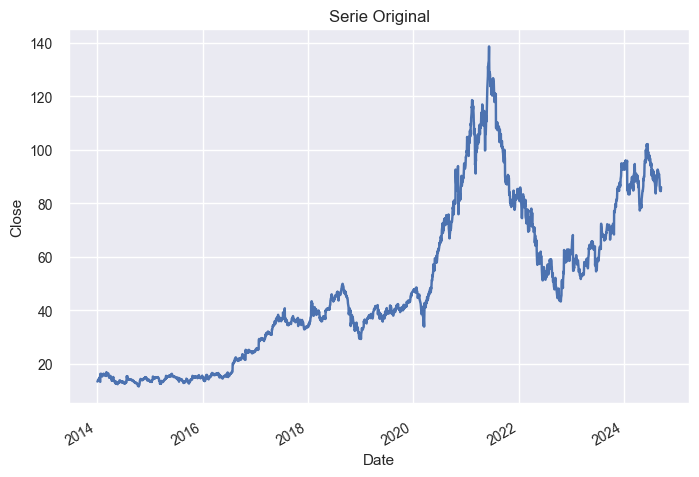

In [29]:
nlag = 40
plt.style.use('seaborn-v0_8-notebook')

data['Close'].plot()
plt.title('Serie Original')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

Se puede notar un aumento en el precio de cierre a lo largo de los a√±os, entre 2020 y finales del 2021 este crecimiento fue m√°s notorio. Hubo una gran disminuci√≥n en el precio de ajustado de cierre desde finales del 2021 hasta mediados del 2022. No parece ser estacionaria. 



#### $\mathtt{Autocorrelaci√≥n}$

Ac√°, usamos los lags para medir la autocorrelaci√≥n, que es la correlaci√≥n de la serie de tiempo con una versi√≥n retrasada de s√≠ misma, para identificar patrones y posibles dependencias temporales en los datos.

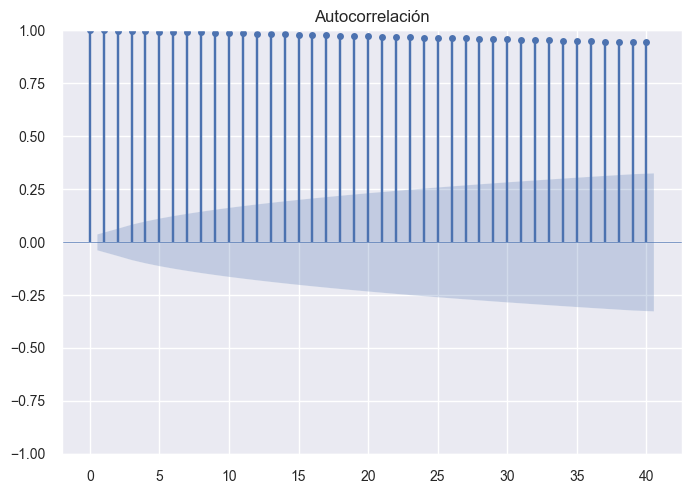

In [30]:
plot_acf(data['Close'], lags=nlag, linewidth=0.5)  # Autocorrelaci√≥n
plt.title('Autocorrelaci√≥n')
plt.show()

Al revisar la autocorrelaci√≥n se nota una fuerte correlaci√≥n temporal entre los valores del precio de cierre en diferentes momentos, lo que sugiere un patr√≥n de dependencia a largo plazo o incluso la presencia de una tendencia en los datos. Adem√°s, dado que todos estos valores recaen bajo la zona sombreada, los valores de la serie est√°n correlacionados con los valores de esos periodos anteriores de manera significativa.


#### $\mathtt{Autocorrelaci√≥n\;parcial}$
La gr√°fica de autocorrelaci√≥n parcial, a diferencia de la grafica de autocorrelaci√≥n, mide la correlaci√≥n entre una observaci√≥n y su lag espec√≠fico, eliminando el efecto de los lags intermedios.

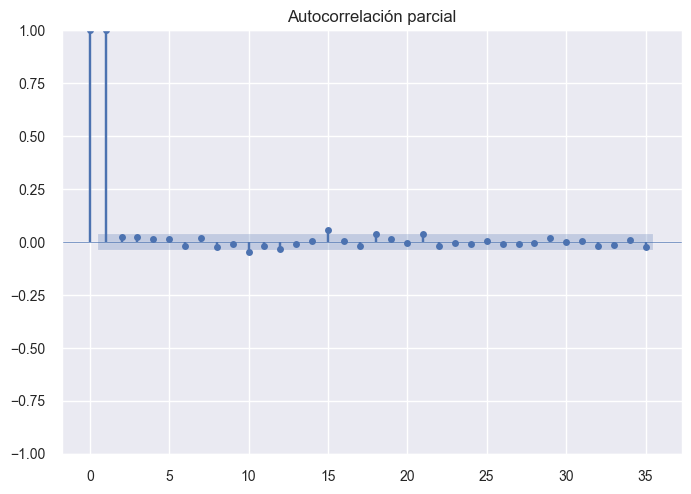

In [31]:
plot_pacf(data['Close'], linewidth = 0.5)
plt.title('Autocorrelaci√≥n parcial')
plt.show()

Los coeficientes PACF bajan r√°pidamente hacia 0, indicando que solo los primeros lags tienen una influencia significativa directa sobre los valores actuales. La gran mayor√≠a de las observaciones de los lags no son significativas.

### $\mathtt{Estacionariedad\;por\;m√©todo\;anal√≠tico\;(Dickey\;Fuller)}$

 **$H_{\theta} : œÅ \geq \alpha$** La serie tiene una ra√≠z unitaria y no es estacionaria.

 **$H_{1} : œÅ < \alpha$** La serie no tiene una ra√≠z unitaria y es estacionaria.


In [32]:
adf_result = adfuller(data["Close"].tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])


ADF Statistic: -0.962046
p-value: 0.766854


Teniendo en cuenta el valor de ADF, el cual no es un valor tan negativo, sugiere que no es estacionaria. Adem√°s, dado que el $ùëù-valor$ de la prueba de Dickey Fuller es $0.766854 > 0.05 = \alpha$, no se rechaza la hip√≥tesis nula, es decir, la serie temporal **no es estacionaria.**

### $\mathtt{Descomposici√≥n\;de\;la\;serie}$

La descomposici√≥n de series temporales es una t√©cnica que permite comprender los componentes de una serie temporal desglosando los datos en sus partes constituyentes, como la tendencia, la estacionalidad y los residuos.

In [33]:
decompose_model = seasonal.seasonal_decompose(data["Close"].tolist(),
period=30, model='additive')

Text(0.5, 1.0, 'Componente residual del precio de cierre de Logitech')

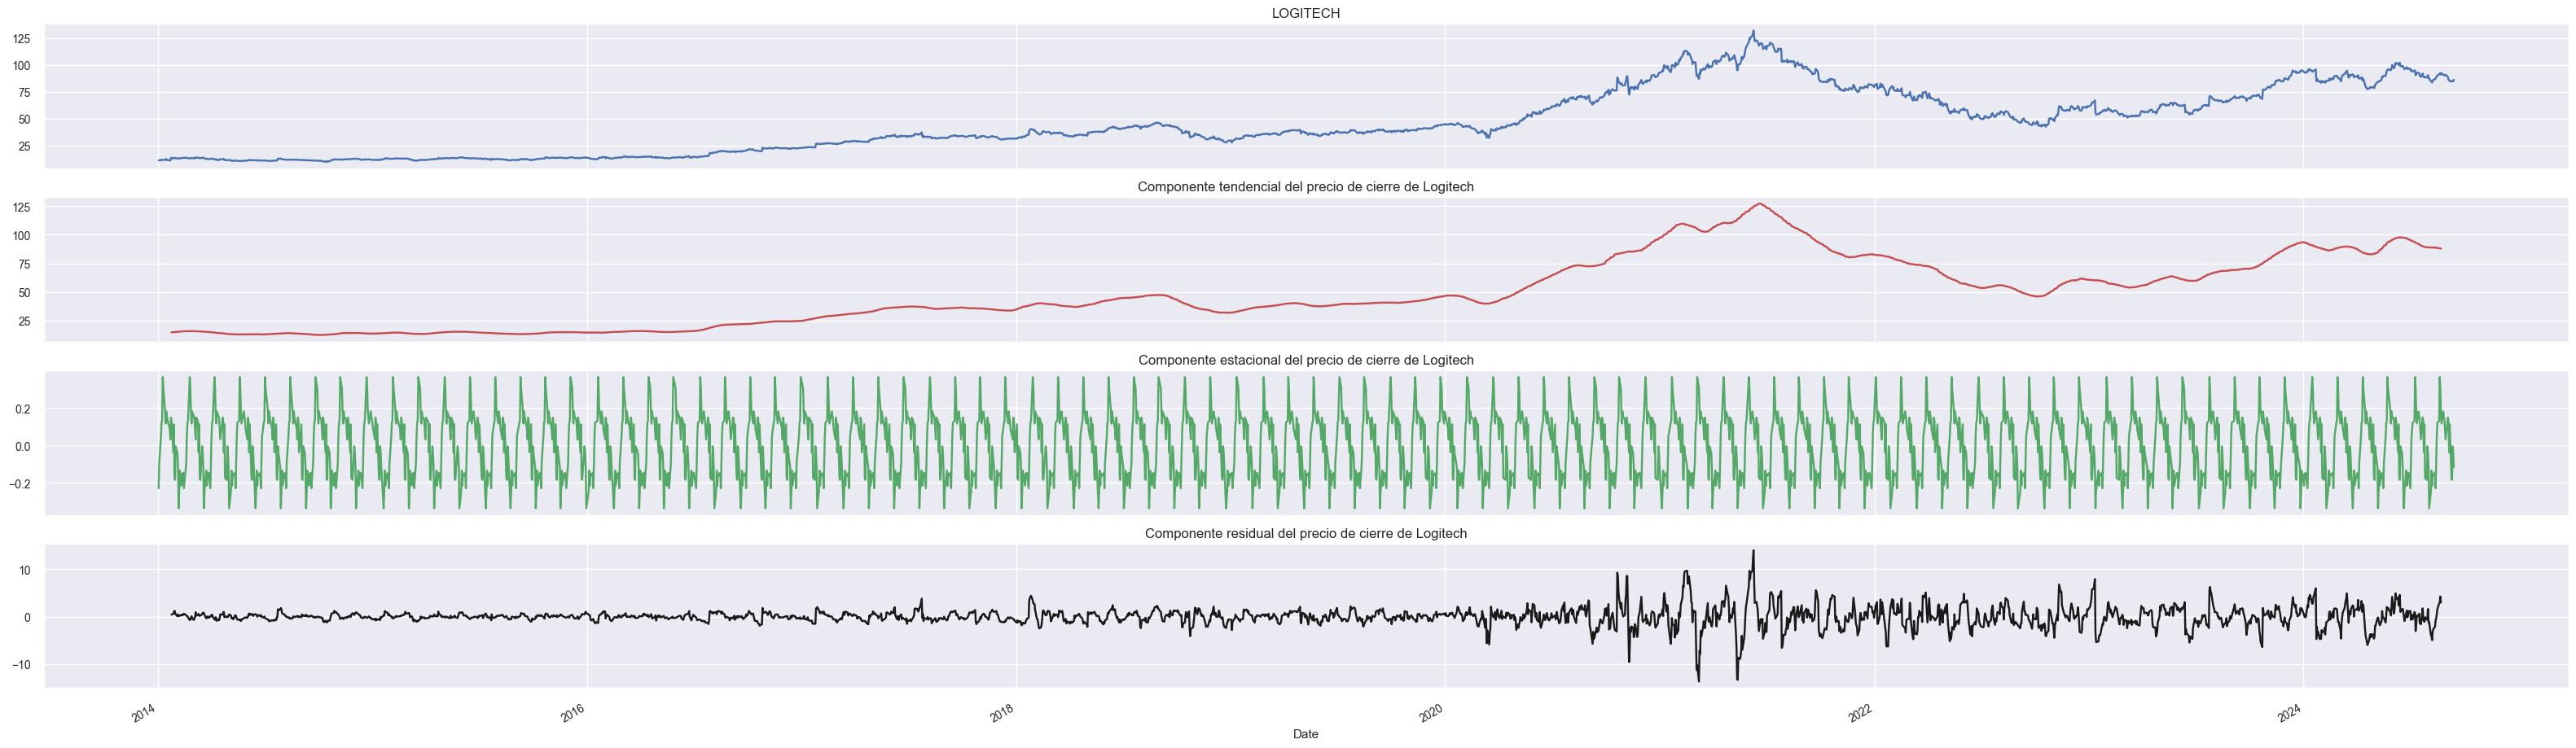

In [34]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(40, 12)

data['Adj Close'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('LOGITECH')

pd.Series(data=decompose_model.trend, index=data.index).plot(color='r',
linestyle='-', ax=axarr[1])
axarr[1].set_title('Componente tendencial del precio de cierre de Logitech')

pd.Series(data=decompose_model.seasonal, index=data.index).plot(color='g',
linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente estacional del precio de cierre de Logitech')

pd.Series(data=decompose_model.resid, index=data.index).plot(color='k',
linestyle='-', ax=axarr[3])
axarr[3].set_title('Componente residual del precio de cierre de Logitech')


$1.\;\mathtt{Componente\;tendencial: }$ este representa el movimiento o la direcci√≥n de los datos a largo plazo que puede caracterizarse por un aumento o una disminuci√≥n gradual o por una estabilidad a lo largo de un per√≠odo prolongado. Para Logitech, en los √∫ltimos 10 a√±os parece haber un tendencia hacia el aumento del precio de cierre a lo largo de los a√±os de manera gradual.

$2.\;\mathtt{Componente\;estacional: }$ este da cuenta de patrones regulares y recurrentes que se manifiestan en intervalos de tiempo fijos. En la gr√°fica se observa un patr√≥n y amplitud constante en los a√±os. 

$3.\;\mathtt{Componente\;residual: }$ por √∫ltimo, el componente residual o error captura las fluctuaciones aleatorias o *ruido* que no pueden ser explicadas por la tendencia o el componente estacional. Esta no parece tener un patr√≥n seg√∫n la gr√°fica.

Verifiquemos ahora la no estacionalidad y normalidad de los residuos de la descomposici√≥n.

In [35]:
adf_result = adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],autolag='AIC')
print(adf_result[1])

3.09958429416318e-26


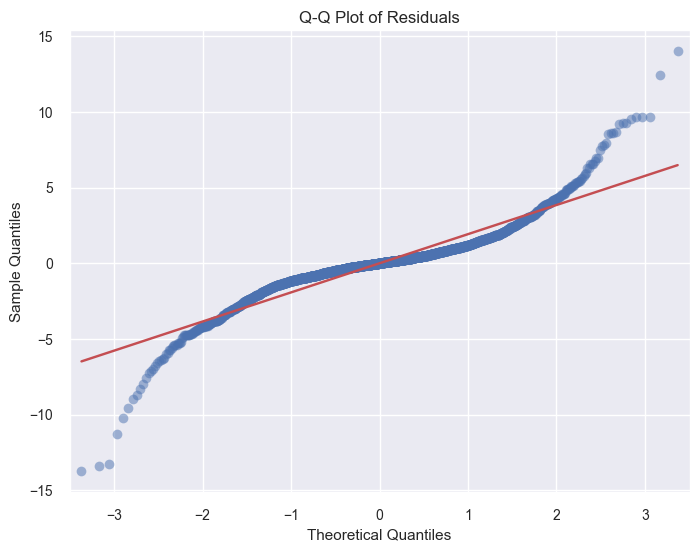

In [36]:
decompose_model = seasonal.seasonal_decompose(data['Close'], period=30, model='additive')

plt.rcParams.update({'figure.figsize': (8, 6)})
fig = sm.qqplot(decompose_model.resid.dropna(), line='s', alpha=0.5, color='b', lw=2)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.grid(True)
plt.show()

In [37]:
resid_clean = pd.Series(decompose_model.resid).replace([np.inf, -np.inf], np.nan).dropna()

stat, p = shapiro(resid_clean)

alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('No normal')

print('Statistics=%.3f, p=%.3f' % (stat, p))

No normal
Statistics=0.874, p=0.000


Donde se encuentra que los residuos no siguen una distribuci√≥n normal, algo bastante notable en la gr√°fica QQ de los residuos. Adem√°s, aparentemente son estacionarios debido al $p-valor$ tan peque√±o obtenido del test de Dickey Fuller para los residuos.

## $\mathtt{Modelo:\;ARIMA}$

El modelo ARIMA (*AutoRegressive Integrated Moving Average*) es una herramienta estad√≠stica de gran utilidad para analizar y pronosticar datos de series temporales. Se adapta expl√≠citamente a un conjunto de estructuras est√°ndar en datos de series temporales y, como tal, proporciona un m√©todo simple pero potente para realizar pron√≥sticos h√°biles de series temporales.

Los par√°metros del modelo ARIMA se definen de la siguiente manera:

$-\;p:$ orden de retardo, que representa la cantidad de observaciones de retardo incorporadas en el modelo.$\newline$
$-\;d:$ grado de diferenciaci√≥n, que indica la cantidad de veces que las observaciones brutas se someten a diferenciaci√≥n.$\newline$
$-\;q:$ orden de promedio m√≥vil, que indica el tama√±o de la ventana de promedio m√≥vil.$\newline$

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### $\mathtt{Diferenciaci√≥n}$

La diferenciaci√≥n puede ayudar a estabilizar la media de una serie temporal eliminando cambios en el nivel de una serie temporal y, por tanto, eliminando (o reduciendo) la tendencia y la estacionalidad.

https://otexts.com/fpp2/stationarity.html

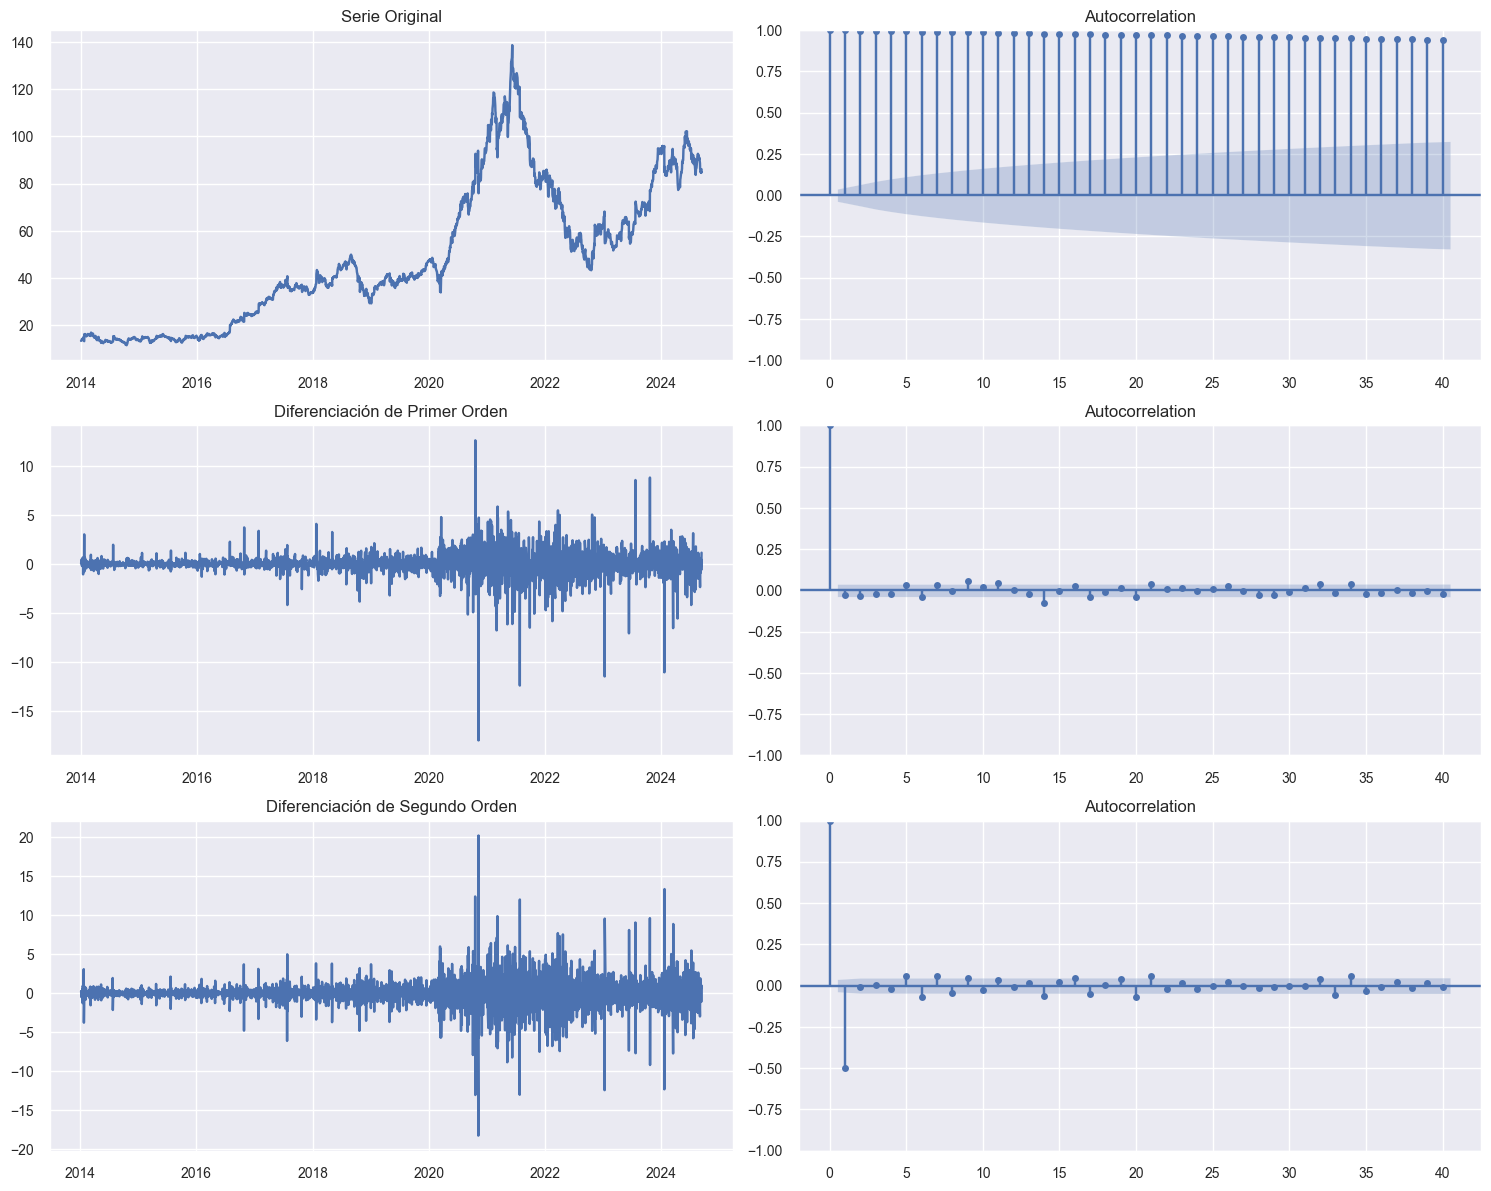

In [38]:
data_reset = data.reset_index()

plt.style.use('seaborn-v0_8-notebook')
plt.rcParams.update({'figure.figsize': (15, 12)})

fig, axes = plt.subplots(3, 2)

axes[0, 0].plot(data_reset['Date'], data_reset['Close'])
axes[0, 0].set_title('Serie Original')
plot_acf(data['Close'], ax=axes[0, 1], lags=40)

axes[1, 0].plot(data_reset['Date'], data_reset['Close'].diff())
axes[1, 0].set_title('Diferenciaci√≥n de Primer Orden')
plot_acf(data['Close'].diff().dropna(), ax=axes[1, 1], lags=40)

axes[2, 0].plot(data_reset['Date'], data_reset['Close'].diff().diff())
axes[2, 0].set_title('Diferenciaci√≥n de Segundo Orden')
plot_acf(data['Close'].diff().diff().dropna(), ax=axes[2, 1], lags=40)

plt.tight_layout()
plt.show()

El cambio brusco en la autocorrelaci√≥n de la diferenciaci√≥n de segundo orden hay un cambio brusco en el lag 1 de positivo a negativo sugiere que la serie ha sido sobrediferenciada, adem√°s de m√°s valores fuera del 95%. Se puede observar tambi√©n la mejora en la estacionaridad, pasando de una serie no estacionaria a una estacionaria. Para confirmar esto, dado que la de segundo orden parece sobrediferenciada, se realizar√° la prueba de Dickey Fuller para la diferenciaci√≥n de primer orden. 

In [39]:
print('Primer orden')
adf_result = adfuller(data["Close"].diff().dropna().tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

print('Segundo orden')
adf_result = adfuller(data["Close"].diff().diff().dropna().tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

Primer orden
ADF Statistic: -11.631321
p-value: 0.000000
Segundo orden
ADF Statistic: -18.357593
p-value: 0.000000


Ac√° se compureba que ambas diferenciaciones, tanto la de primer como segundo orden **son estacionarias**.

### $\mathtt{Criterios\;AIC,\;BIC,\;HQIC}$
Los criterios *AIC* (Akaike Information Criterion), *BIC* (Bayesian Information Criterion) y *HQIC* (Hannan-Quinn Information Criterion) son herramientas utilizadas en la selecci√≥n de modelos estad√≠sticos para determinar cu√°l es el modelo m√°s adecuado entre varios candidatos. Cada uno de estos criterios tiene un enfoque ligeramente diferente en la penalizaci√≥n por la complejidad del modelo

- AIC se utiliza cuando se busca un equilibrio entre ajuste y complejidad.
- BIC es preferido si se desea evitar sobreajuste, especialmente con muestras grandes.
- HQIC es una opci√≥n intermedia que puede ser √∫til si ninguno de los extremos de AIC o BIC se ajusta bien a las necesidades.


In [40]:
n = len(data['Close']); n_test = 29; train_size = n - n_test

train = data['Close'][:train_size]
dates_train = data.index[:train_size]

test = data['Close'][train_size:train_size + n_test] 
dates = data.index[train_size:train_size + n_test] 

print("train:", train.shape)
print("test:", test.shape)

train: (2664,)
test: (29,)


In [41]:
def evaluate_model(train, order):
    try:
        model = ARIMA(train, order=order).fit()
        return model.aic, model.bic, model.hqic
    except Exception as e:
        print(f"Error al ajustar el modelo con orden {order}: {e}")
        return np.inf, np.inf, np.inf

def find_best_arima_order(train):
    best_criteria = {'aic': np.inf, 'bic': np.inf, 'hqic': np.inf}
    best_orders = {'aic': None, 'bic': None, 'hqic': None}
    best_models = {'aic': None, 'bic': None, 'hqic': None}

    pq_rng = range(5)
    d_rng = range(3)

    for p in pq_rng:
        for d in d_rng:
            for q in pq_rng:
                order = (p, d, q)
                aic, bic, hqic = evaluate_model(train, order)
                
                if aic < best_criteria['aic']:
                    best_criteria['aic'] = aic
                    best_orders['aic'] = order
                    best_models['aic'] = (aic, bic, hqic)
                
                if bic < best_criteria['bic']:
                    best_criteria['bic'] = bic
                    best_orders['bic'] = order
                    best_models['bic'] = (aic, bic, hqic)
                
                if hqic < best_criteria['hqic']:
                    best_criteria['hqic'] = hqic
                    best_orders['hqic'] = order
                    best_models['hqic'] = (aic, bic, hqic)

    return {
        'best_order_aic': best_orders['aic'],
        'best_aic': best_criteria['aic'],
        'best_order_bic': best_orders['bic'],
        'best_bic': best_criteria['bic'],
        'best_order_hqic': best_orders['hqic'],
        'best_hqic': best_criteria['hqic']
    }

results = find_best_arima_order(train)
print(f"Mejor orden AIC: {results['best_order_aic']}, AIC: {results['best_aic']}")
print(f"Mejor orden BIC: {results['best_order_bic']}, BIC: {results['best_bic']}")
print(f"Mejor orden HQIC: {results['best_order_hqic']}, HQIC: {results['best_hqic']}")


Mejor orden AIC: (4, 1, 4), AIC: 8938.104514795763
Mejor orden BIC: (0, 1, 0), BIC: 8960.912039509234
Mejor orden HQIC: (3, 1, 2), HQIC: 8951.554096999918



El modelo ARIMA se define por tres par√°metros: el primero corresponde al orden autoregresivo ($p$), el segundo a la diferenciaci√≥n ($d$) y el tercero al n√∫mero de t√©rminos de media m√≥vil ($q$). En el caso del mejor modelo seg√∫n el criterio AIC, el orden (4, 1, 4) significa que se est√°n utilizando 4 t√©rminos autoregresivos ($p=4$), una diferenciaci√≥n para hacer la serie estacionaria ($d=1$), y 4 t√©rminos de media m√≥vil ($q=4$), lo que resulta en un ajuste m√°s preciso a los datos. Seg√∫n el criterio BIC, el modelo m√°s simple tiene un orden (0, 1, 0), es decir, no incluye t√©rminos autoregresivos ni de media m√≥vil, solo una diferenciaci√≥n ($d=1$). Por √∫ltimo, el modelo seleccionado por el HQIC tiene un orden (3, 1, 2), lo que significa que emplea 3 t√©rminos autoregresivos ($p=3$), una diferenciaci√≥n ($d=1$) y 2 t√©rminos de media m√≥vil ($q=2$), encontrando un equilibrio entre ajuste y simplicidad

#### $\mathtt{Funciones\;auxiliares}$


In [42]:
def fit_arima_model(history, order):
    try:
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        return model_fit
    except Exception as e:
        print(f"Error al ajustar el modelo ARIMA con el orden {order}: {e}")
        return None

In [43]:
def create_error_table(y_true, y_pred):

    errors = calculate_errors(y_true, y_pred)
    df_errors = pd.DataFrame(list(errors.items()), columns=['M√©trica', 'Valor'])
    
    return df_errors


In [44]:
def calculate_errors(y_true, y_pred):
    # Calcular MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calcular MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Calcular MSE
    mse = mean_squared_error(y_true, y_pred)

    # Calcular RMSE
    rmse = np.sqrt(mse)

    # Calcular R2
    r2 = r2_score(y_true, y_pred)

    return {
        'MAPE': mape,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


## $\mathtt{ARIMA:\;AIC}$
### $\mathtt{ARIMA \; con\;rolling}$

In [45]:
def arima_rolling(history, test, best_order):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]

        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions


In [46]:
horizons = [7, 14, 21, 28]
results_rolling = {}

for i in horizons:
    results_rolling[i] = arima_rolling(list(train), test[:i], results['best_order_aic'])

predicted=87.454185, expected=84.849998
predicted=85.156928, expected=84.599998
predicted=84.642357, expected=83.699997
predicted=83.831259, expected=85.480003
predicted=85.622751, expected=86.120003
predicted=86.184269, expected=86.650002
predicted=86.627259, expected=87.760002
predicted=87.454185, expected=84.849998
predicted=85.156928, expected=84.599998
predicted=84.642357, expected=83.699997
predicted=83.831259, expected=85.480003
predicted=85.622751, expected=86.120003
predicted=86.184269, expected=86.650002
predicted=86.627259, expected=87.760002
predicted=87.485034, expected=88.260002
predicted=88.132949, expected=89.160004
predicted=88.960864, expected=90.230003
predicted=90.239447, expected=91.260002
predicted=91.072289, expected=91.620003
predicted=91.598002, expected=92.639999
predicted=92.507822, expected=91.129997
predicted=87.454185, expected=84.849998
predicted=85.156928, expected=84.599998
predicted=84.642357, expected=83.699997
predicted=83.831259, expected=85.480003


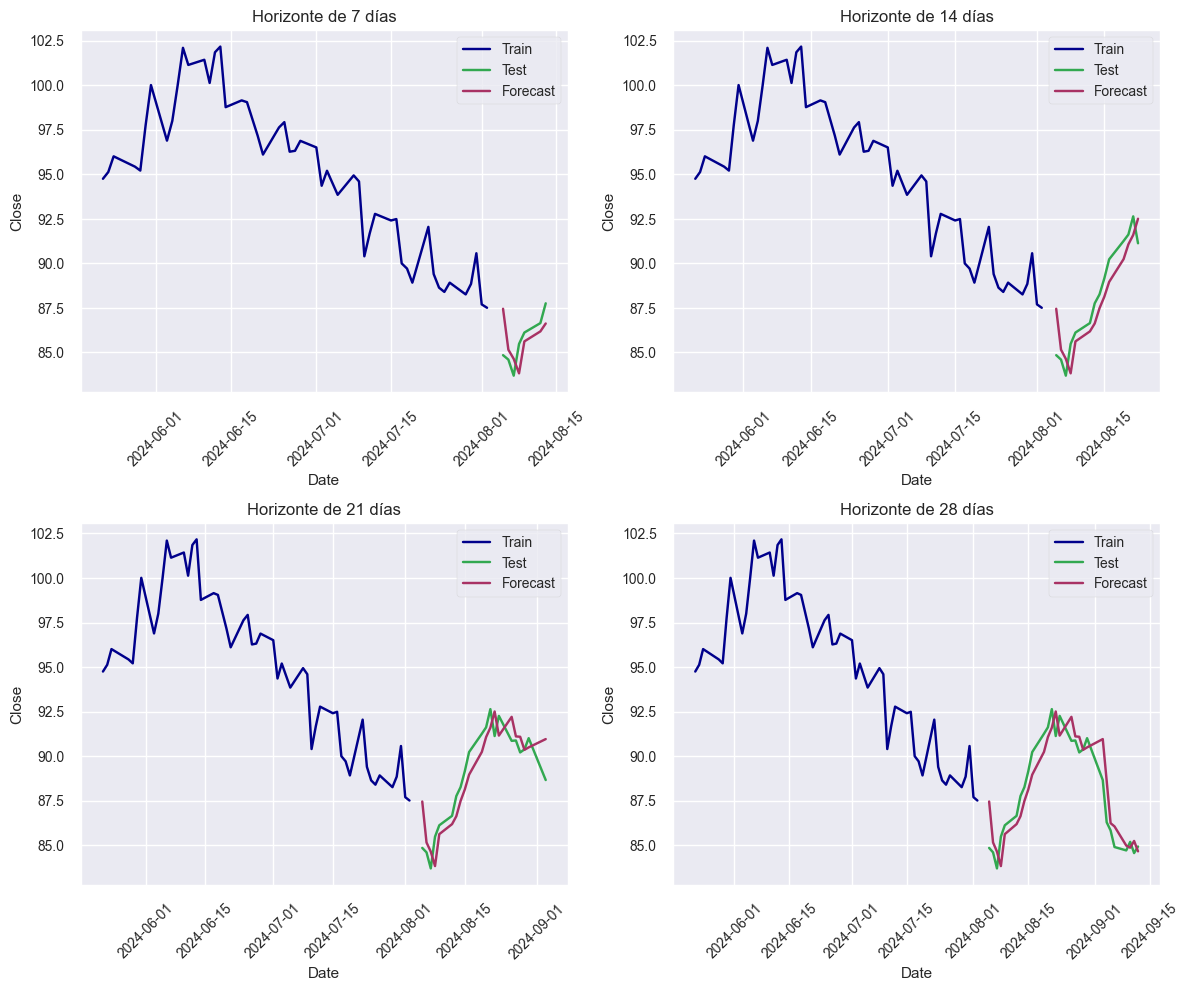

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]

    dates_test = dates[:horizon]
    predicted_values = [pd.Series(pred).values for pred in results_rolling[horizon]]
    
    test_df = pd.DataFrame({'Test': test[:horizon].values}, index=test[:horizon].index)

    pred_df = pd.DataFrame({
        'Date': dates_test,
        'Forecast': list(predicted_values)
    }).set_index('Date')

    
    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=pred_df.index, y=test_df['Test'], label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=pred_df.index, y= [arr[0] for arr in pred_df['Forecast']], label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

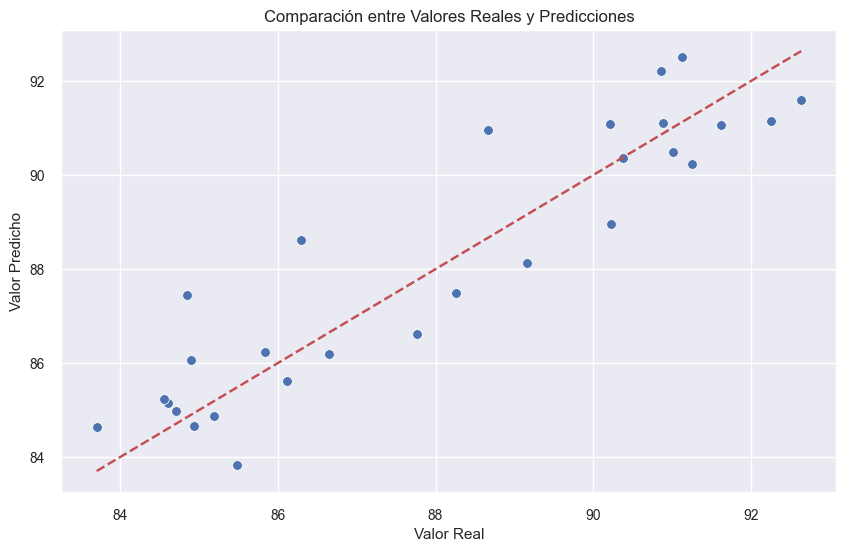

In [48]:
comparison_df = pd.DataFrame({
    'Real': test_df['Test'],
    'Predicted': [arr[0] for arr in pred_df['Forecast']]
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

Se observa como los datos predichos con el mejor orden seg√∫n AIC con ARIMA con rolling vs. los esperados siguen una distribuci√≥n bastante cercana a una recta de 45 grados.

In [49]:
d7 = create_error_table(test_df['Test'][:7], [arr[0] for arr in pred_df['Forecast']][:7])
d14  = create_error_table(test_df['Test'][:14], [arr[0] for arr in pred_df['Forecast']][:14])
d21= create_error_table(test_df['Test'][:21], [arr[0] for arr in pred_df['Forecast']][:21])
d28  = create_error_table(test_df['Test'][:28], [arr[0] for arr in pred_df['Forecast']][:28])

raic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

raic

M√©trica    D√≠as 7   D√≠as 14   D√≠as 21   D√≠as 28
0    MAPE  1.312539  1.212652  1.146243  1.087074
1     MAE  1.121135  1.064800  1.014617  0.955439
2     MSE  1.777947  1.431246  1.402353  1.324720
3    RMSE  1.333397  1.196347  1.184210  1.150965
4      R2 -0.108722  0.822724  0.802789  0.835196

Los resultados de las m√©tricas de evaluaci√≥n del modelo para 28 d√≠as reflejan una buena precisi√≥n en las predicciones. El *MAPE* es de 1.087, lo que indica que, en promedio, las predicciones difieren del valor real en aproximadamente un 1.09%. El *MAE* es de 0.955, mostrando que el error absoluto medio es de 0.96 unidades, mientras que el *MSE* es de 1.324, lo que refleja la magnitud promedio de los errores cuadr√°ticos, sugiriendo que algunos errores grandes est√°n afectando m√°s el resultado. El *RMSE*, que ajusta los errores al nivel original de los datos, es de 1.151, lo que indica un error promedio de 1.15 unidades. Finalmente, el *R2* de 0.835 sugiere que el modelo explica el 83.5% de la variabilidad de los datos, lo que implica un buen ajuste.

### $\mathtt{ARIMA\;sin\;rolling}$

In [50]:
def arima_no_rolling(train, test, best_order, horizons):
    results = {}
    predictions_dates = {}

    for horizon in horizons:
        model_fit = fit_arima_model(train, best_order)

        if model_fit:
            predictions = model_fit.forecast(steps=horizon)
            prediction_dates = test.index[:horizon]
            real_values = test[:horizon]
            predictions_dates[horizon] = prediction_dates
            results[horizon] = predictions
        else:
            print(f"Error al ajustar el modelo ARIMA para horizonte {horizon} d√≠as.")
            results[horizon] = np.nan

    for horizon in horizons:

        for i, date in enumerate(predictions_dates[horizon]):
            try:
                real_value = real_values.iloc[i]
                predicted_value = results[horizon][i + len(train)]
                print(f"{date.date()} | {real_value:.4f}      | {predicted_value:.4f}")
            except IndexError:
                print(f"Error de √≠ndice en horizonte {horizon}, posici√≥n {i}")
                break
    return results, predictions_dates

In [51]:
horizons = [7, 14, 21, 28]
results_no_rolling, prediction_dates_no_rolling = arima_no_rolling(train, test, results['best_order_aic'], horizons)

2024-08-05 | 84.8500      | 87.4542
2024-08-06 | 84.6000      | 87.7389
2024-08-07 | 83.7000      | 87.6074
2024-08-08 | 85.4800      | 87.5688
2024-08-09 | 86.1200      | 87.3852
2024-08-12 | 86.6500      | 87.5196
2024-08-13 | 87.7600      | 87.6201
2024-08-05 | 84.8500      | 87.4542
2024-08-06 | 84.6000      | 87.7389
2024-08-07 | 83.7000      | 87.6074
2024-08-08 | 85.4800      | 87.5688
2024-08-09 | 86.1200      | 87.3852
2024-08-12 | 86.6500      | 87.5196
2024-08-13 | 87.7600      | 87.6201
2024-08-14 | 88.2600      | 87.6948
2024-08-15 | 89.1600      | 87.5598
2024-08-16 | 90.2300      | 87.4377
2024-08-19 | 91.2600      | 87.4636
2024-08-20 | 91.6200      | 87.5922
2024-08-21 | 92.6400      | 87.6980
2024-08-22 | 91.1300      | 87.5921
2024-08-05 | 84.8500      | 87.4542
2024-08-06 | 84.6000      | 87.7389
2024-08-07 | 83.7000      | 87.6074
2024-08-08 | 85.4800      | 87.5688
2024-08-09 | 86.1200      | 87.3852
2024-08-12 | 86.6500      | 87.5196
2024-08-13 | 87.7600      | 

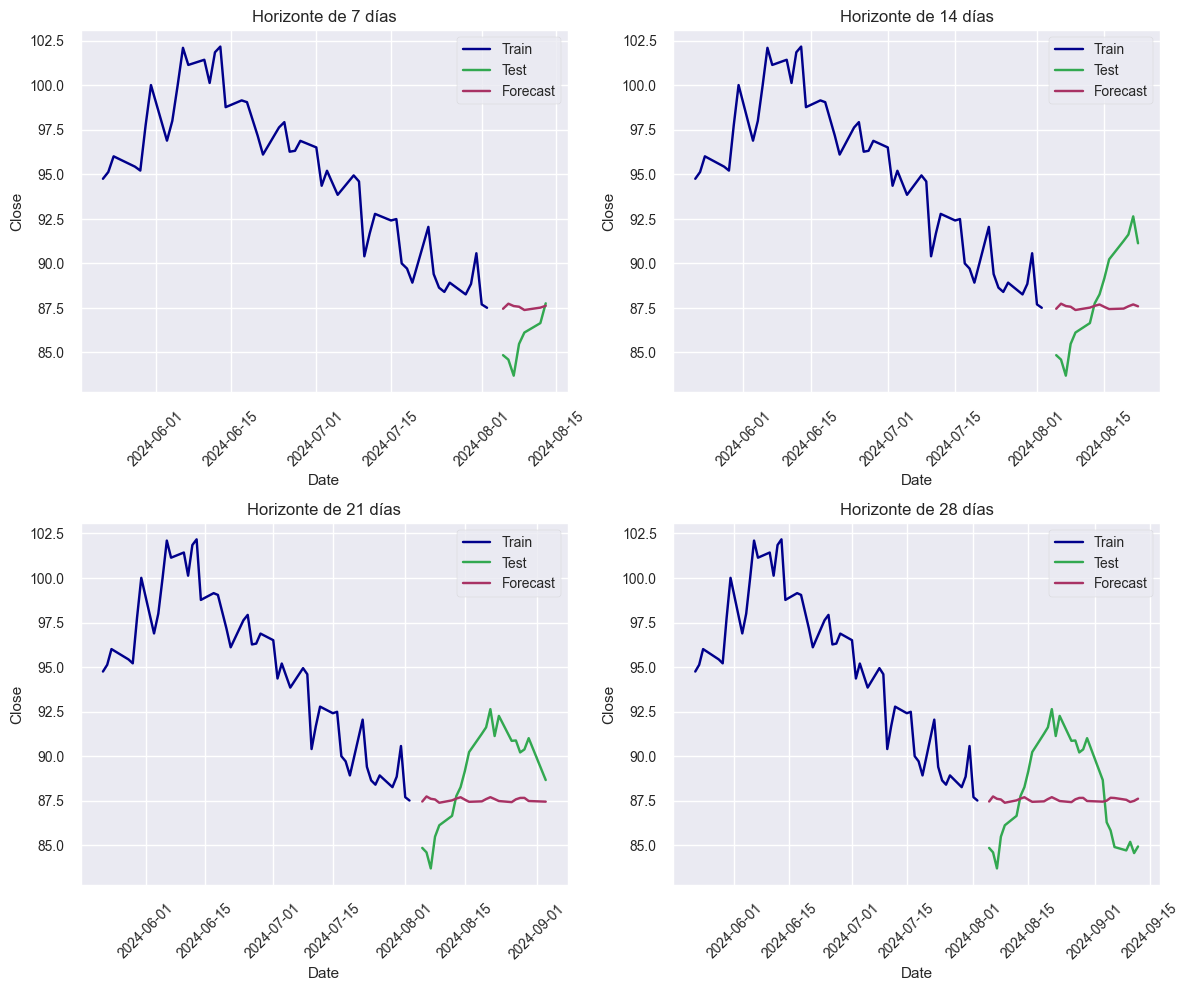

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]
    
    dates_test = prediction_dates_no_rolling[horizon]
    test_values = test.loc[dates_test]
    predicted_values = results_no_rolling[horizon]

    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=dates_test, y=test_values, label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=dates_test, y=predicted_values, label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Ajustar el dise√±o para evitar solapamientos
plt.tight_layout()
plt.show()


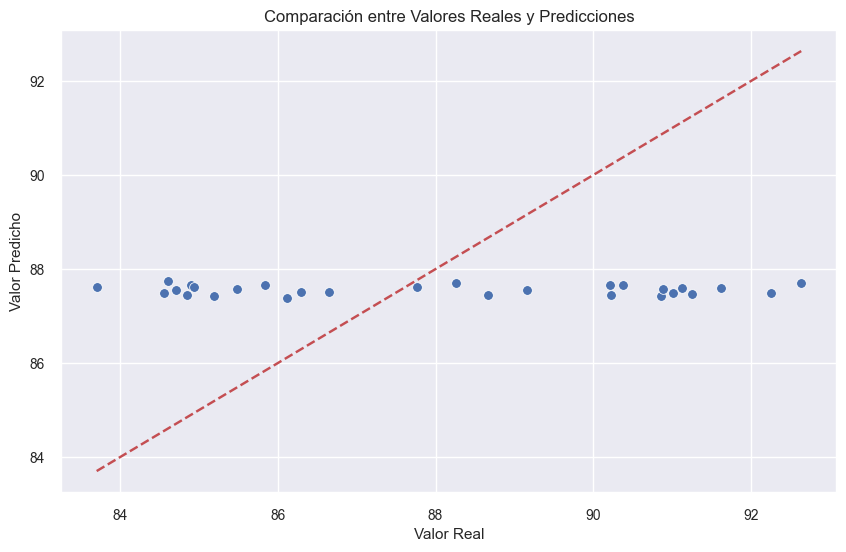

In [53]:
comparison_df = pd.DataFrame({
    'Real': test_values.tolist(),
    'Predicted': results_no_rolling[28].tolist()
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

La gr√°fica de correlaci√≥n para los valores predichos con los esperados del conjunto de test para ARIMA (AIC) sin rolling no se ve para nada bien, los valores obtenidos de las predicciones son todos muy similares, tal como se observa en las cuatro gr√°ficas de arriba, cuyas predicciones siguen una distribuci√≥n practicamente lineal (180 grados). 

In [54]:
d7 = create_error_table(test_values[:7], predicted_values[:7])
d14  = create_error_table(test_values[:14], predicted_values[:14])
d21= create_error_table(test_values[:21], predicted_values[:21])
d28  = create_error_table(test_values[:28], predicted_values[:28])

nraic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

nraic

M√©trica    D√≠as 7   D√≠as 14   D√≠as 21   D√≠as 28
0    MAPE       NaN       NaN       NaN       NaN
1     MAE  2.002013  2.519703  2.705316  2.618068
2     MSE  5.520341  8.349668  9.062227  8.271219
3    RMSE  2.349541  2.889579  3.010353  2.875973
4      R2 -2.442467 -0.034200 -0.274406 -0.028992

El *MAE* es de 2.618, lo que significa que, en promedio, las predicciones a 28 d√≠as difieren de los valores reales en 2.62 unidades. El *MSE*, que mide los errores cuadr√°ticos, es de 8.271, lo que sugiere la presencia de errores relativamente grandes. El RMSE, que es la ra√≠z cuadrada del *MSE*, es de 2.876, indicando que el error promedio en las predicciones es alto. Finalmente, el R2 es negativo (-0.029), lo que implica que el modelo no explica la variabilidad de los datos, siendo incluso peor que simplemente predecir el valor promedio. Esto indica un ajuste deficiente del modelo.

### $\mathtt{Normalidad\;e\;independencia\;de\;los\;residuos}$

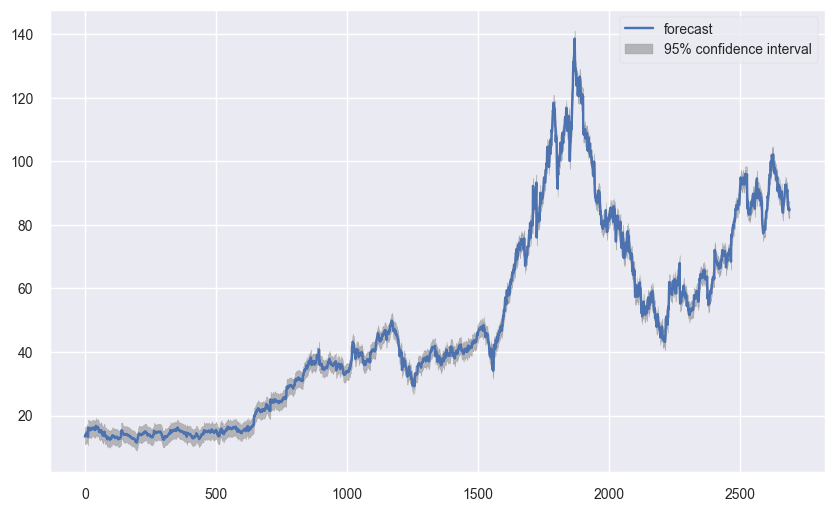

In [97]:
modeloaic = ARIMA(data['Close'].tolist(),order = results['best_order_hqic']).fit()

plt.rcParams.update({'figure.figsize': (10,6)})
fig, ax = plt.subplots()
plot_predict(modeloaic, 2, ax = ax)
plt.show()

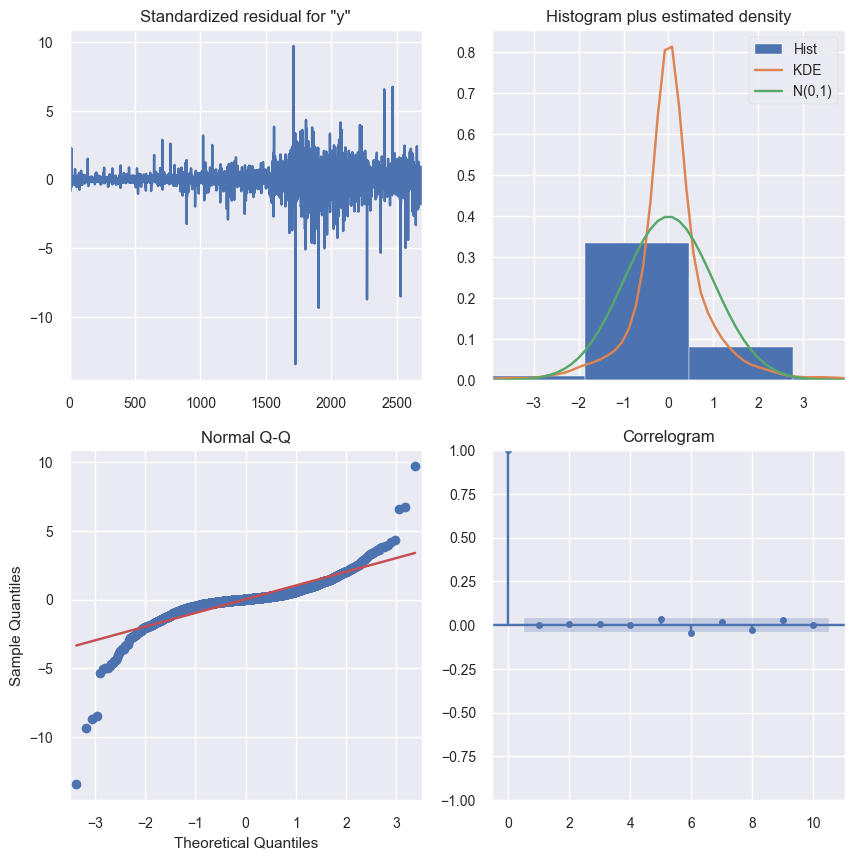

In [99]:
modeloaic.plot_diagnostics()
plt.show()

El primer gr√°fico muestra los residuos (diferencia entre los valores observados y los valores ajustados) frente a los valores ajustados. Idealmente, los residuos deben estar distribuidos aleatoriamente alrededor de cero y no mostrar ning√∫n patr√≥n sistem√°tico, sin embargo, en la gr√°fica en bastantes observaciones estos residuos difieren bastante de 0.

El segundo gr√°fico, histograma, muestra la distribuci√≥n de los residuos en un histograma. La distribuci√≥n deber√≠a parecerse a una distribuci√≥n normal, con una forma de campana sim√©trica alrededor de cero. Un histograma muy asim√©trico o sesgado indica que los residuos no est√°n distribuidos normalmente. Tal como se observa en la gr√°fica, estos residuos no siguen una distribuci√≥n normal, lo cual es confirmado con el tercer gr√°fico: Q-Q plot.

En cuanto a la cuarta gr√°fica, el correlograma, no se observa autocorrelaci√≥n significativa en los diferentes retardos (lags). En el gr√°fico, las barras que se extienden m√°s all√° de las bandas de confianza indican autocorrelaci√≥n en esos retardos, lo que sugiere que el modelo puede no estar capturando todas las dependencias en los datos, sin embargo, esto no se presenta para este modelo. 

In [93]:
resid_clean = pd.Series(modeloaic.resid).replace([np.inf, -np.inf], np.nan).dropna()
stat, p = shapiro(resid_clean)

alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('No normal')

print('Statistics=%.3f, p=%.3f' % (stat, p))

No normal
Statistics=0.777, p=0.000


Esto confirma que los residuos no siguen una distribuci√≥n normal, tal como se observaba en el histograma y los Q-Q plots.

## $\mathtt{ARIMA:\;BIC}$
### $\mathtt{ARIMA \; con\;rolling}$

In [55]:
horizons = [7, 14, 21, 28]
results_rolling = {}

for i in horizons:
    results_rolling[i] = arima_rolling(list(train), test[:i], results['best_order_bic'])

predicted=87.510002, expected=84.849998
predicted=84.849998, expected=84.599998
predicted=84.599998, expected=83.699997
predicted=83.699997, expected=85.480003
predicted=85.480003, expected=86.120003
predicted=86.120003, expected=86.650002
predicted=86.650002, expected=87.760002
predicted=87.510002, expected=84.849998
predicted=84.849998, expected=84.599998
predicted=84.599998, expected=83.699997
predicted=83.699997, expected=85.480003
predicted=85.480003, expected=86.120003
predicted=86.120003, expected=86.650002
predicted=86.650002, expected=87.760002
predicted=87.760002, expected=88.260002
predicted=88.260002, expected=89.160004
predicted=89.160004, expected=90.230003
predicted=90.230003, expected=91.260002
predicted=91.260002, expected=91.620003
predicted=91.620003, expected=92.639999
predicted=92.639999, expected=91.129997
predicted=87.510002, expected=84.849998
predicted=84.849998, expected=84.599998
predicted=84.599998, expected=83.699997
predicted=83.699997, expected=85.480003


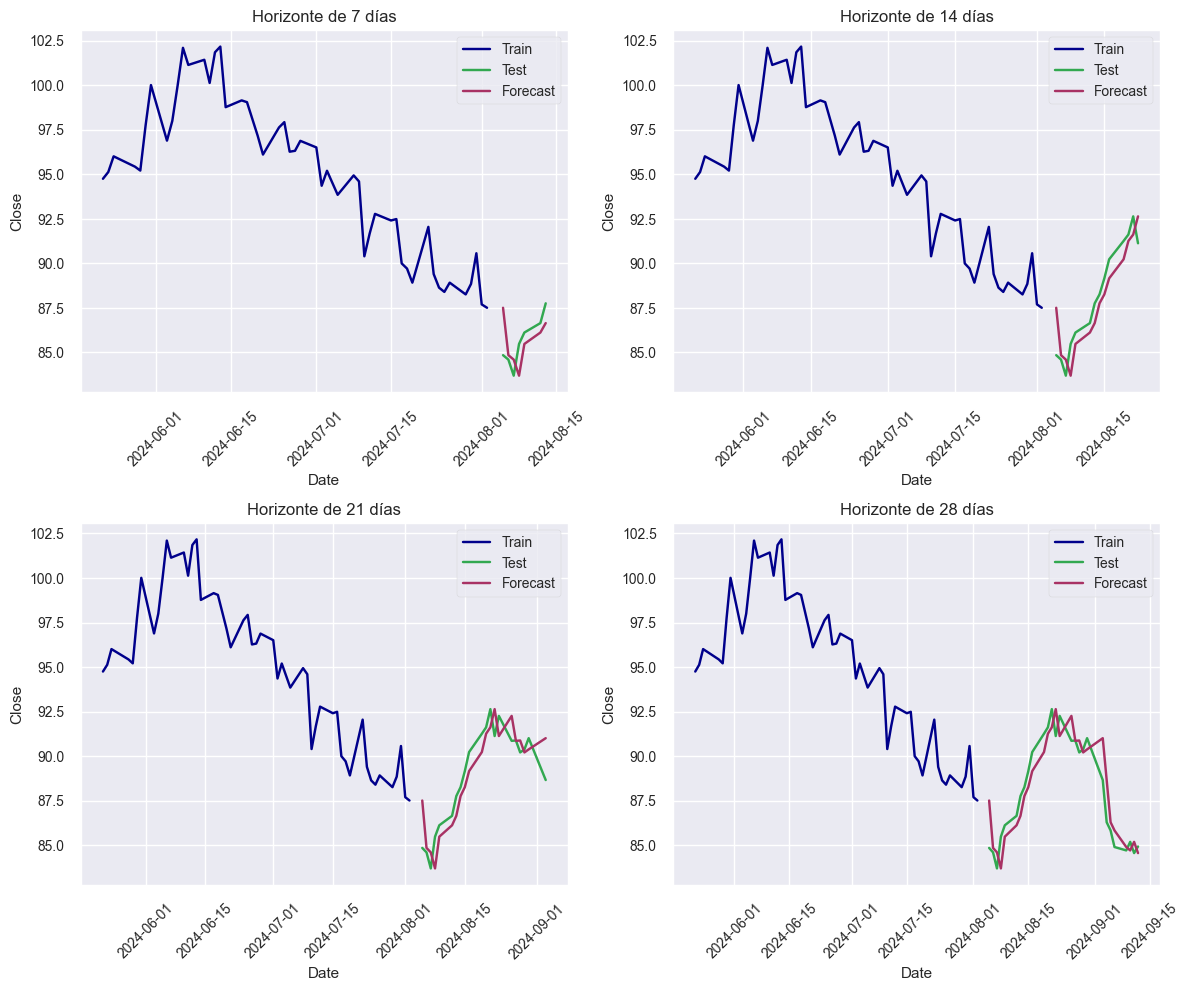

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]

    dates_test = dates[:horizon]
    predicted_values = [pd.Series(pred).values for pred in results_rolling[horizon]]
    
    test_df = pd.DataFrame({'Test': test[:horizon].values}, index=test[:horizon].index)

    pred_df = pd.DataFrame({
        'Date': dates_test,
        'Forecast': list(predicted_values)
    }).set_index('Date')

    
    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=pred_df.index, y=test_df['Test'], label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=pred_df.index, y= [arr[0] for arr in pred_df['Forecast']], label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

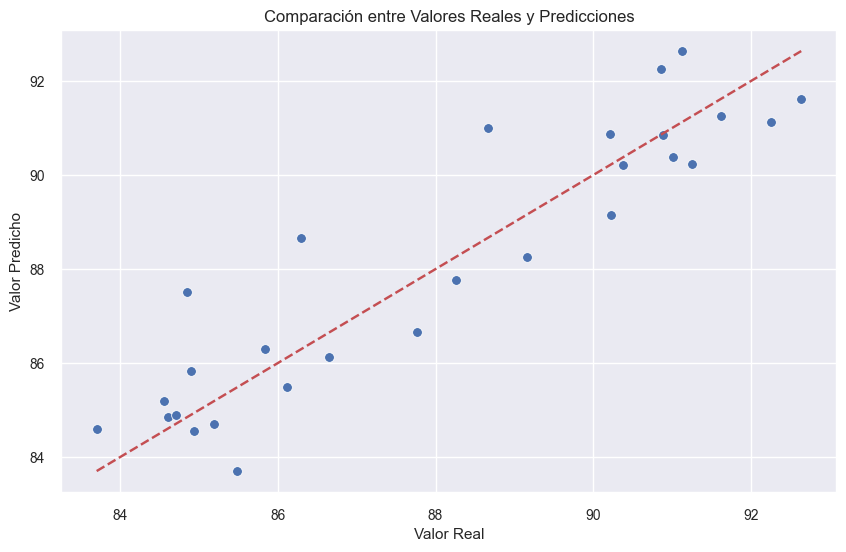

In [57]:
comparison_df = pd.DataFrame({
    'Real': test_df['Test'],
    'Predicted': [arr[0] for arr in pred_df['Forecast']]
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

Se observa como los datos predichos con el mejor orden seg√∫n BIC con ARIMA con rolling vs. los esperados siguen una distribuci√≥n bastante cercana a una recta de 45 grados.

In [58]:
d7 = create_error_table(test_df['Test'][:7], [arr[0] for arr in pred_df['Forecast']][:7])
d14  = create_error_table(test_df['Test'][:14], [arr[0] for arr in pred_df['Forecast']][:14])
d21= create_error_table(test_df['Test'][:21], [arr[0] for arr in pred_df['Forecast']][:21])
d28  = create_error_table(test_df['Test'][:28], [arr[0] for arr in pred_df['Forecast']][:28])

rbic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

rbic

M√©trica    D√≠as 7   D√≠as 14   D√≠as 21   D√≠as 28
0    MAPE  1.315387  1.160648  1.110016  1.059167
1     MAE  1.124287  1.018572  0.982382  0.930715
2     MSE  1.862735  1.411075  1.399503  1.317260
3    RMSE  1.364820  1.187887  1.183006  1.147719
4      R2 -0.161595  0.825223  0.803190  0.836125


Los resultados indican que para la predicci√≥n a 28 d√≠as el modelo tiene un rendimiento decente en las predicciones. El *MAPE* es de 1.06%, lo que significa que el error absoluto porcentual promedio es bajo, indicando buenas predicciones en t√©rminos relativos. El *MAE* es de 0.93, lo que sugiere que, en promedio, las predicciones difieren de los valores reales en menos de una unidad. El *MSE*, que mide los errores cuadr√°ticos, es de 1.32, mientras que el *RMSE* es de 1.15, lo que indica que los errores promedio son bajos en t√©rminos absolutos. Finalmente, el *R2* de 0.836 indica que el modelo explica el 83.6% de la variabilidad de los datos, lo que sugiere un buen ajuste del modelo.

### $\mathtt{ARIMA \; sin\;rolling}$

In [59]:
horizons = [7, 14, 21, 28]
results_no_rolling, prediction_dates_no_rolling = arima_no_rolling(train, test, results['best_order_bic'], horizons)

2024-08-05 | 84.8500      | 87.5100
2024-08-06 | 84.6000      | 87.5100
2024-08-07 | 83.7000      | 87.5100
2024-08-08 | 85.4800      | 87.5100
2024-08-09 | 86.1200      | 87.5100
2024-08-12 | 86.6500      | 87.5100
2024-08-13 | 87.7600      | 87.5100
2024-08-05 | 84.8500      | 87.5100
2024-08-06 | 84.6000      | 87.5100
2024-08-07 | 83.7000      | 87.5100
2024-08-08 | 85.4800      | 87.5100
2024-08-09 | 86.1200      | 87.5100
2024-08-12 | 86.6500      | 87.5100
2024-08-13 | 87.7600      | 87.5100
2024-08-14 | 88.2600      | 87.5100
2024-08-15 | 89.1600      | 87.5100
2024-08-16 | 90.2300      | 87.5100
2024-08-19 | 91.2600      | 87.5100
2024-08-20 | 91.6200      | 87.5100
2024-08-21 | 92.6400      | 87.5100
2024-08-22 | 91.1300      | 87.5100
2024-08-05 | 84.8500      | 87.5100
2024-08-06 | 84.6000      | 87.5100
2024-08-07 | 83.7000      | 87.5100
2024-08-08 | 85.4800      | 87.5100
2024-08-09 | 86.1200      | 87.5100
2024-08-12 | 86.6500      | 87.5100
2024-08-13 | 87.7600      | 

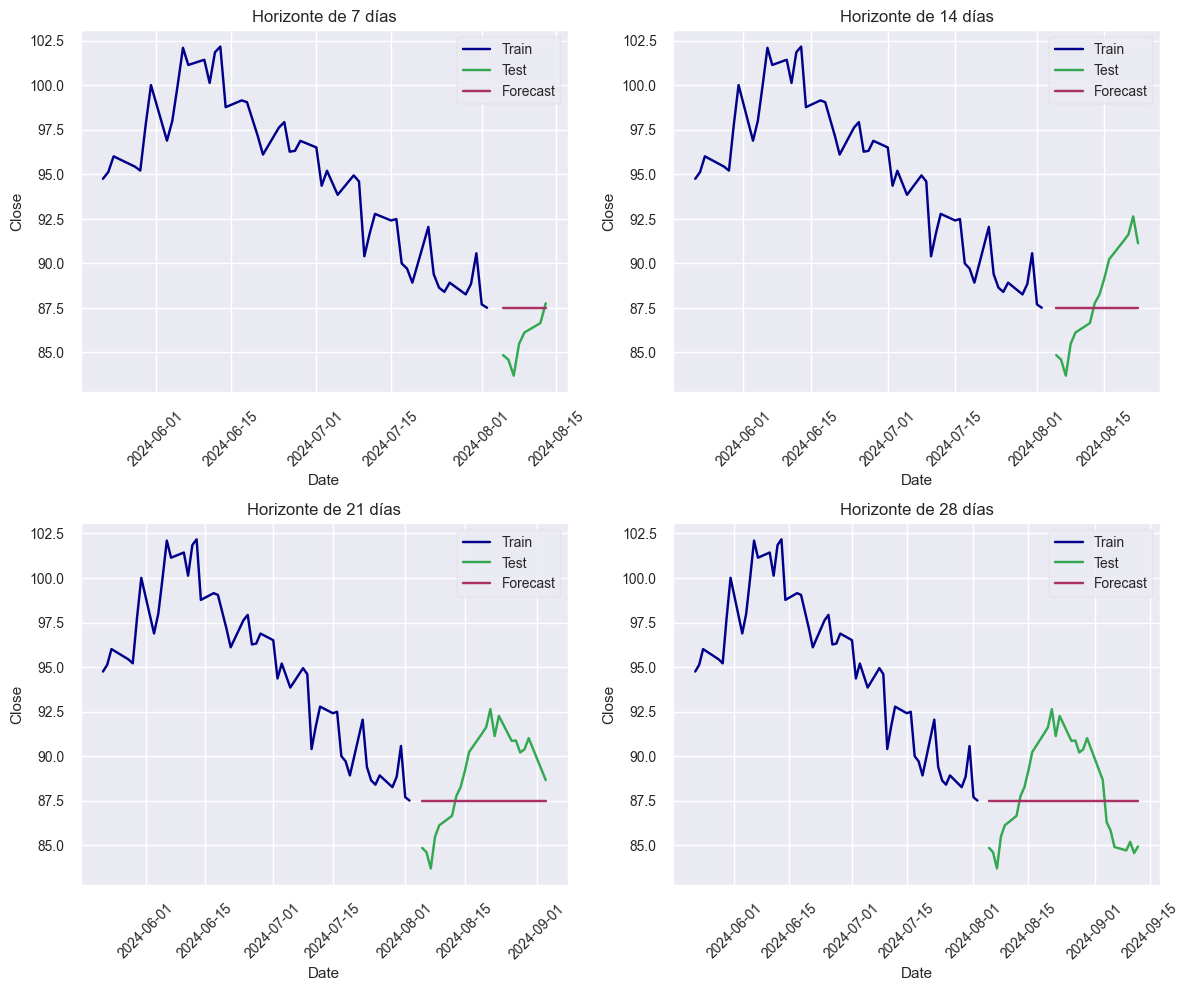

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]
    
    dates_test = prediction_dates_no_rolling[horizon]
    test_values = test.loc[dates_test]
    predicted_values = results_no_rolling[horizon]

    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=dates_test, y=test_values, label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=dates_test, y=predicted_values, label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


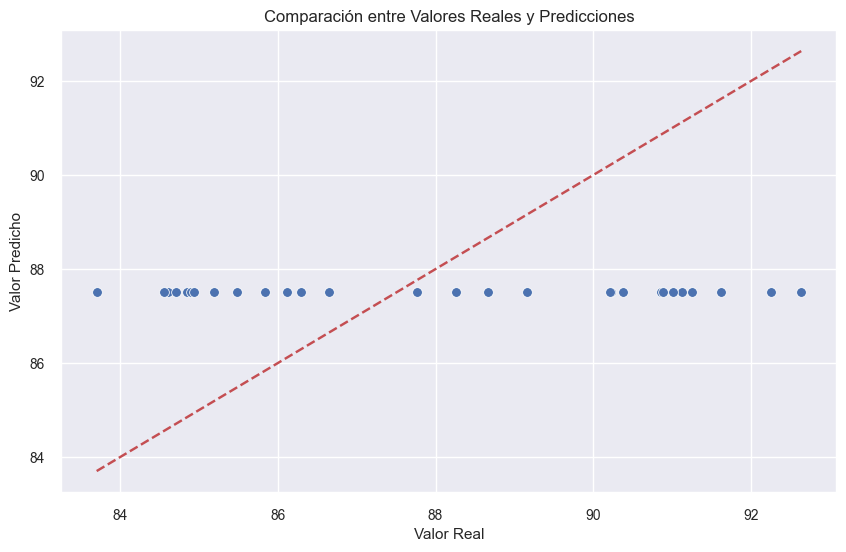

In [61]:
comparison_df = pd.DataFrame({
    'Real': test_values.tolist(),
    'Predicted': results_no_rolling[28].tolist()
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

La gr√°fica de correlaci√≥n para los valores predichos con los esperados del conjunto de test para ARIMA (AIC) sin rolling no se ve para nada bien, los valores obtenidos de las predicciones son todos muy similares, tal como se observa en las cuatro gr√°ficas de arriba, cuyas predicciones siguen una distribuci√≥n practicamente lineal (180 grados). 

In [62]:
d7 = create_error_table(test_values[:7], predicted_values[:7])
d14  = create_error_table(test_values[:14], predicted_values[:14])
d21= create_error_table(test_values[:21], predicted_values[:21])
d28  = create_error_table(test_values[:28], predicted_values[:28])

nrbic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

nrbic

M√©trica    D√≠as 7   D√≠as 14   D√≠as 21   D√≠as 28
0    MAPE       NaN       NaN       NaN       NaN
1     MAE  1.987144  2.545715  2.730000  2.624643
2     MSE  5.273568  8.426731  9.153116  8.282847
3    RMSE  2.296425  2.902883  3.025412  2.877993
4      R2 -2.288580 -0.043745 -0.287187 -0.030439

Los resultados sugieren que el modelo para 28 d√≠as tiene un rendimiento deficiente. El *MAE* es de 2.62, lo que significa que el error absoluto promedio es relativamente alto. El *MSE* de 8.28 y el RMSE de 2.88 reflejan errores grandes en las predicciones en comparaci√≥n con los valores reales. El *R2* es negativo (-0.03), lo que indica que el modelo no es capaz de explicar la variabilidad de los datos y, en realidad, es peor que una predicci√≥n basada en la media.

### $\mathtt{Normalidad\;e\;independencia\;de\;los\;residuos}$

In [87]:
modelobic = ARIMA(data['Close'].tolist(),order = results['best_order_bic']).fit()

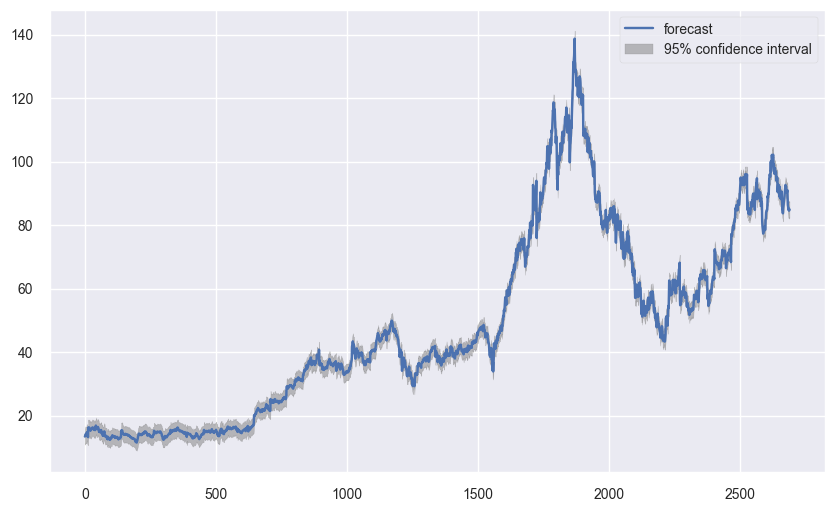

In [88]:
plt.rcParams.update({'figure.figsize': (10,6)})
fig, ax = plt.subplots()
plot_predict(modelobic, 2, ax = ax)
plt.show()

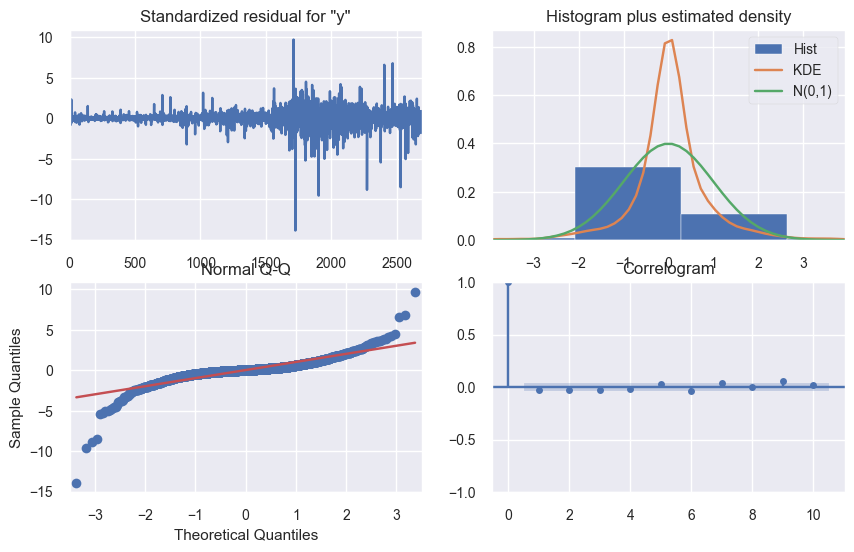

In [89]:
modelobic.plot_diagnostics()
plt.show()

El primer gr√°fico muestra los residuos (diferencia entre los valores observados y los valores ajustados) frente a los valores ajustados. Idealmente, los residuos deben estar distribuidos aleatoriamente alrededor de cero y no mostrar ning√∫n patr√≥n sistem√°tico, sin embargo, en la gr√°fica en bastantes observaciones estos residuos difieren bastante de 0.

El segundo gr√°fico, histograma, muestra la distribuci√≥n de los residuos en un histograma. La distribuci√≥n deber√≠a parecerse a una distribuci√≥n normal, con una forma de campana sim√©trica alrededor de cero. Un histograma muy asim√©trico o sesgado indica que los residuos no est√°n distribuidos normalmente. Tal como se observa en la gr√°fica, estos residuos no siguen una distribuci√≥n normal, lo cual es confirmado con el tercer gr√°fico: Q-Q plot.

En cuanto a la cuarta gr√°fica, el correlograma, no se observa autocorrelaci√≥n significativa en los diferentes retardos (lags). En el gr√°fico, las barras que se extienden m√°s all√° de las bandas de confianza indican autocorrelaci√≥n en esos retardos, lo que sugiere que el modelo puede no estar capturando todas las dependencias en los datos, sin embargo, esto no se presenta para este modelo. 

In [90]:
resid_clean = pd.Series(modelobic.resid).replace([np.inf, -np.inf], np.nan).dropna()
stat, p = shapiro(resid_clean)

alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('No normal')

print('Statistics=%.3f, p=%.3f' % (stat, p))

No normal
Statistics=0.770, p=0.000


Esto confirma que los residuos no siguen una distribuci√≥n normal, tal como se observaba en el histograma y los Q-Q plots.

## $\mathtt{ARIMA:\;HQIC}$
### $\mathtt{ARIMA \; con\;rolling}$

In [63]:
horizons = [7, 14, 21, 28]
results_rolling = {}

for i in horizons:
    results_rolling[i] = arima_rolling(list(train), test[:i], results['best_order_hqic'])

predicted=87.540915, expected=84.849998
predicted=0.000000, expected=84.599998
predicted=84.738930, expected=83.699997
predicted=83.834252, expected=85.480003
predicted=85.511683, expected=86.120003
predicted=86.043793, expected=86.650002
predicted=86.498993, expected=87.760002
predicted=87.540915, expected=84.849998
predicted=0.000000, expected=84.599998
predicted=84.738930, expected=83.699997
predicted=83.834252, expected=85.480003
predicted=85.511683, expected=86.120003
predicted=86.043793, expected=86.650002
predicted=86.498993, expected=87.760002
predicted=87.679529, expected=88.260002
predicted=88.031198, expected=89.160004
predicted=88.948909, expected=90.230003
predicted=90.056308, expected=91.260002
predicted=91.141990, expected=91.620003
predicted=91.585299, expected=92.639999
predicted=92.669868, expected=91.129997
predicted=87.540915, expected=84.849998
predicted=0.000000, expected=84.599998
predicted=84.738930, expected=83.699997
predicted=83.834252, expected=85.480003
pre

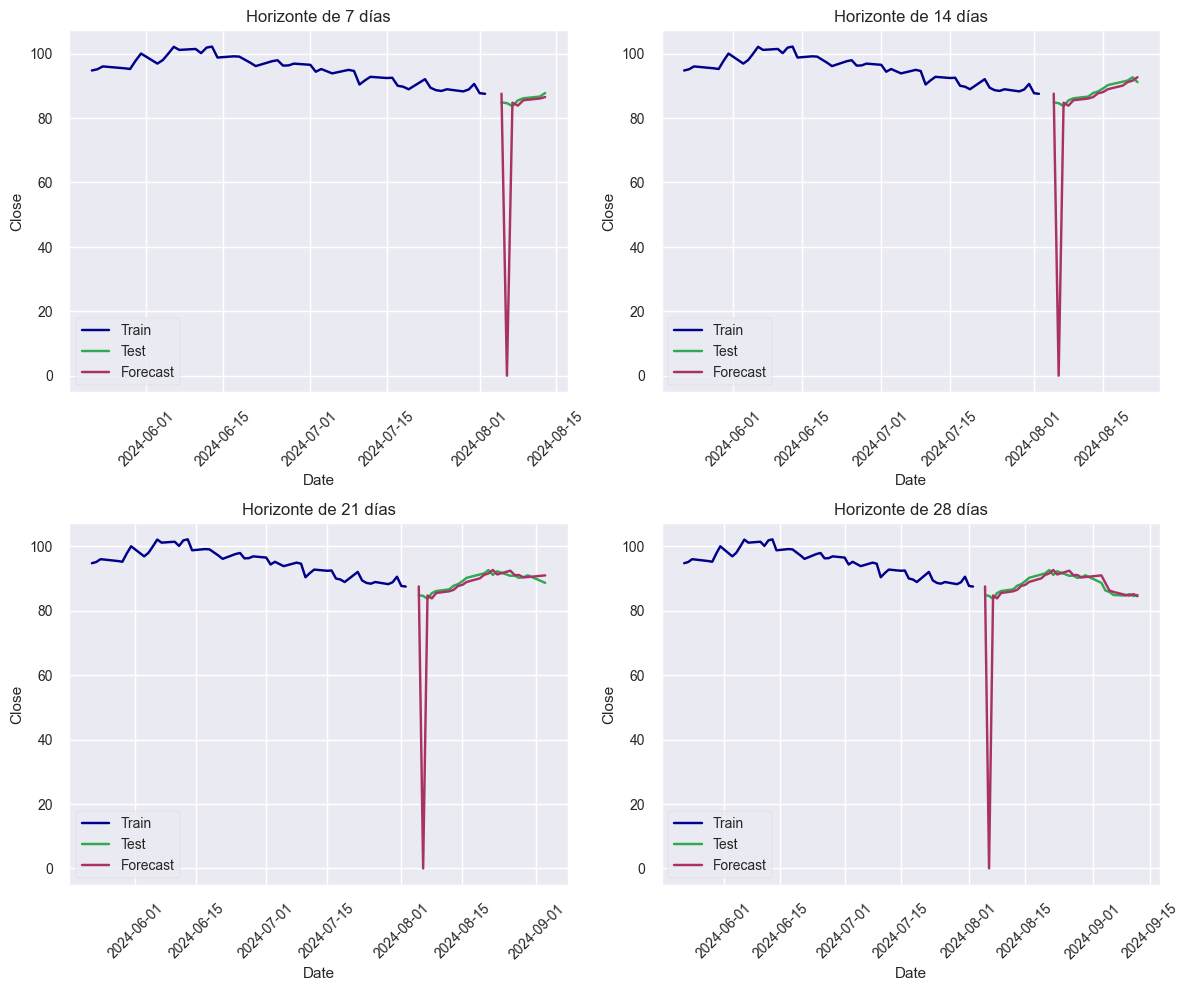

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]

    dates_test = dates[:horizon]
    predicted_values = [pd.Series(pred).values for pred in results_rolling[horizon]]
    
    test_df = pd.DataFrame({'Test': test[:horizon].values}, index=test[:horizon].index)

    pred_df = pd.DataFrame({
        'Date': dates_test,
        'Forecast': list(predicted_values)
    }).set_index('Date')

    
    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=pred_df.index, y=test_df['Test'], label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=pred_df.index, y= [arr[0] for arr in pred_df['Forecast']], label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

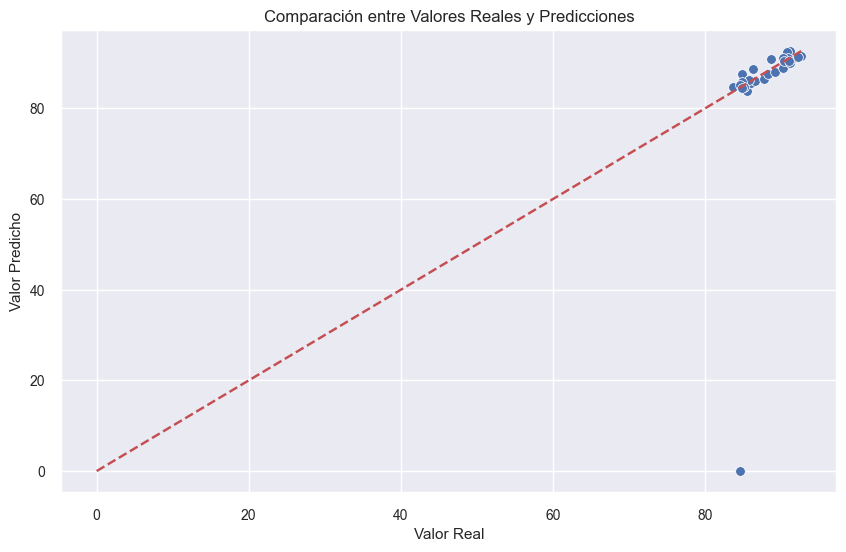

In [65]:
comparison_df = pd.DataFrame({
    'Real': test_df['Test'],
    'Predicted': [arr[0] for arr in pred_df['Forecast']]
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

Hubo un d√≠a muy mal ajustada por el modelo que da√±a todas las m√©tricas tenidas en cuenta. Predice un valor de 0. 

In [66]:
d7 = create_error_table(test_df['Test'][:7], [arr[0] for arr in pred_df['Forecast']][:7])
d14  = create_error_table(test_df['Test'][:14], [arr[0] for arr in pred_df['Forecast']][:14])
d21= create_error_table(test_df['Test'][:21], [arr[0] for arr in pred_df['Forecast']][:21])
d28  = create_error_table(test_df['Test'][:28], [arr[0] for arr in pred_df['Forecast']][:28])

rhqic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

rhqic

M√©trica       D√≠as 7     D√≠as 14     D√≠as 21     D√≠as 28
0    MAPE    15.597257    8.370949    5.924117    4.669373
1     MAE    13.207305    7.122699    5.058275    3.987300
2     MSE  1024.359477  512.780690  342.326566  257.006110
3    RMSE    32.005616   22.644661   18.502069   16.031410
4      R2  -637.787237  -62.513607  -47.140810  -30.973186

Los resultados muestran que el modelo tiene un rendimiento extremadamente pobre para la predicci√≥n tanto de 7, 14, 21 y 28 d√≠as. En el caso de 28 d√≠as, el *MAPE* de 4.67 indica que el error porcentual promedio es muy elevado, lo que significa que las predicciones est√°n lejos de los valores reales. El *MAE* de 3.99 tambi√©n refleja un error absoluto considerable en las predicciones. El *MSE*, con un valor de 257, y el *RMSE* de 16.03 sugieren grandes discrepancias entre las predicciones y los datos reales. Adem√°s, el *R2* negativo (-30.97) indica que el modelo no solo no explica la variabilidad de los datos, sino que est√° mucho peor que si se utilizara simplemente la media de los valores reales para hacer predicciones.

### $\mathtt{ARIMA \; sin\;rolling}$

In [67]:
horizons = [7, 14, 21, 28]
results_no_rolling, prediction_dates_no_rolling = arima_no_rolling(train, test, results['best_order_hqic'], horizons)

2024-08-05 | 84.8500      | 87.5409
2024-08-06 | 84.6000      | 87.5615
2024-08-07 | 83.7000      | 87.5665
2024-08-08 | 85.4800      | 87.5570
2024-08-09 | 86.1200      | 87.5367
2024-08-12 | 86.6500      | 87.5112
2024-08-13 | 87.7600      | 87.4862
2024-08-05 | 84.8500      | 87.5409
2024-08-06 | 84.6000      | 87.5615
2024-08-07 | 83.7000      | 87.5665
2024-08-08 | 85.4800      | 87.5570
2024-08-09 | 86.1200      | 87.5367
2024-08-12 | 86.6500      | 87.5112
2024-08-13 | 87.7600      | 87.4862
2024-08-14 | 88.2600      | 87.4669
2024-08-15 | 89.1600      | 87.4563
2024-08-16 | 90.2300      | 87.4554
2024-08-19 | 91.2600      | 87.4632
2024-08-20 | 91.6200      | 87.4769
2024-08-21 | 92.6400      | 87.4931
2024-08-22 | 91.1300      | 87.5080
2024-08-05 | 84.8500      | 87.5409
2024-08-06 | 84.6000      | 87.5615
2024-08-07 | 83.7000      | 87.5665
2024-08-08 | 85.4800      | 87.5570
2024-08-09 | 86.1200      | 87.5367
2024-08-12 | 86.6500      | 87.5112
2024-08-13 | 87.7600      | 

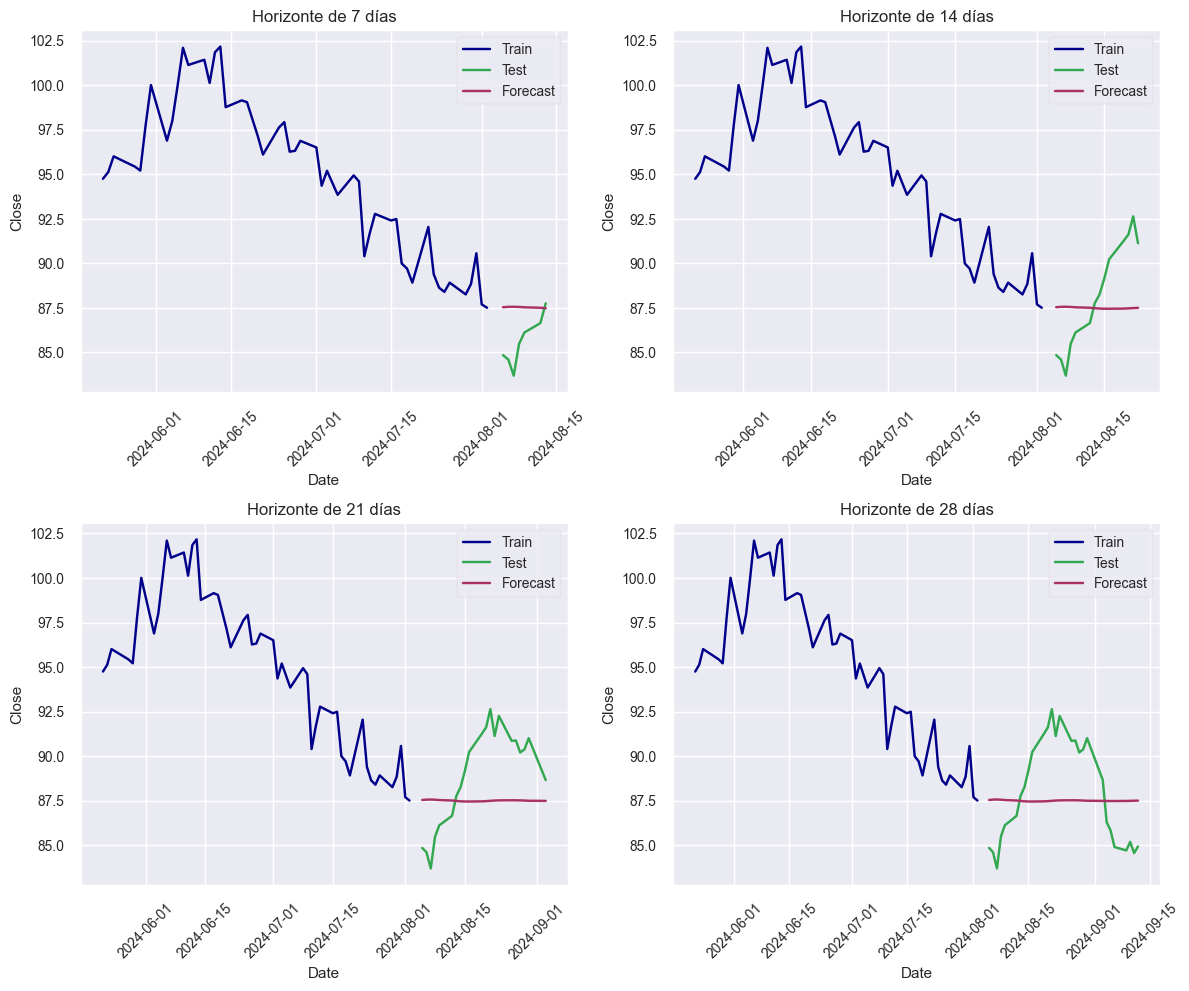

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

horizons = [7, 14, 21, 28]

for i, horizon in enumerate(horizons):
    ax = axs[i // 2, i % 2]
    
    dates_test = prediction_dates_no_rolling[horizon]
    test_values = test.loc[dates_test]
    predicted_values = results_no_rolling[horizon]

    train_dates = train.index
    train_values = train
    
    sns.lineplot(ax=ax, x=train_dates[-50:], y=train_values[-50:], label='Train', color='#00008B')
    sns.lineplot(ax=ax, x=dates_test, y=test_values, label='Test', color='#32a850')
    sns.lineplot(ax=ax, x=dates_test, y=predicted_values, label='Forecast', color='#a83264')
    
    ax.set_title(f'Horizonte de {horizon} d√≠as')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Ajustar el dise√±o para evitar solapamientos
plt.tight_layout()
plt.show()


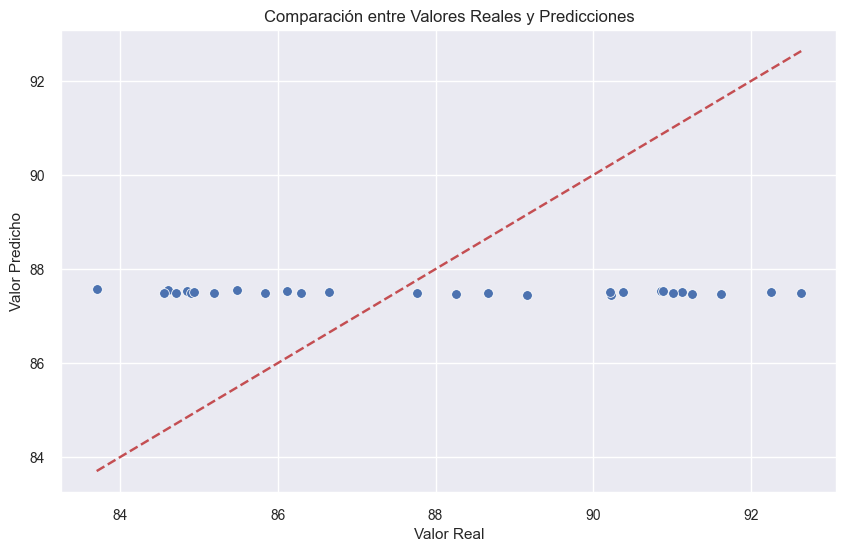

In [69]:
comparison_df = pd.DataFrame({
    'Real': test_values.tolist(),
    'Predicted': results_no_rolling[28].tolist()
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=comparison_df, x='Real', y='Predicted', ax=ax, color='b', marker='o')

min_val = min(comparison_df['Real'].min(), comparison_df['Predicted'].min())
max_val = max(comparison_df['Real'].max(), comparison_df['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

ax.set_title('Comparaci√≥n entre Valores Reales y Predicciones')
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predicho')
ax.grid(True)

plt.show()

La gr√°fica de correlaci√≥n para los valores predichos con los esperados del conjunto de test para ARIMA (QHIC) sin rolling no se ve para nada bien, los valores obtenidos de las predicciones son todos muy similares, tal como se observa en las cuatro gr√°ficas de arriba, cuyas predicciones siguen una distribuci√≥n practicamente lineal (180 grados). 

In [70]:
d7 = create_error_table(test_values[:7], predicted_values[:7])
d14  = create_error_table(test_values[:14], predicted_values[:14])
d21= create_error_table(test_values[:21], predicted_values[:21])
d28  = create_error_table(test_values[:28], predicted_values[:28])

nrhqic = pd.DataFrame({
    'M√©trica': d7['M√©trica'],
    'D√≠as 7': d7['Valor'],
    'D√≠as 14': d14['Valor'],
    'D√≠as 21': d21['Valor'],
    'D√≠as 28': d28['Valor']
})

nrhqic

M√©trica    D√≠as 7   D√≠as 14   D√≠as 21   D√≠as 28
0    MAPE       NaN       NaN       NaN       NaN
1     MAE  2.021080  2.580556  2.752778  2.636670
2     MSE  5.442725  8.608524  9.266348  8.345857
3    RMSE  2.332965  2.934029  3.044068  2.888920
4      R2 -2.394065 -0.066262 -0.303111 -0.038277

El *MAE* es de 2.636670, indicando que, en promedio, las predicciones para 28 d√≠as est√°n a 2.637 unidades de los valores reales. El *MSE* es 8.345857, reflejando la variabilidad en los errores, mientras que el *RMSE*, con un valor de 2.888920, muestra que las predicciones se desv√≠an en promedio unas 2.889 unidades de los valores reales. Finalmente, el coeficiente de determinaci√≥n *R2* es de -0.038277, lo que sugiere que el modelo no solo tiene un ajuste deficiente, sino que est√° haciendo predicciones peores que las que se obtendr√≠an al simplemente predecir la media de los valores reales.

### $\mathtt{Normalidad\;e\;independencia\;de\;los\;residuos}$

In [73]:
from statsmodels.graphics.tsaplots import plot_predict

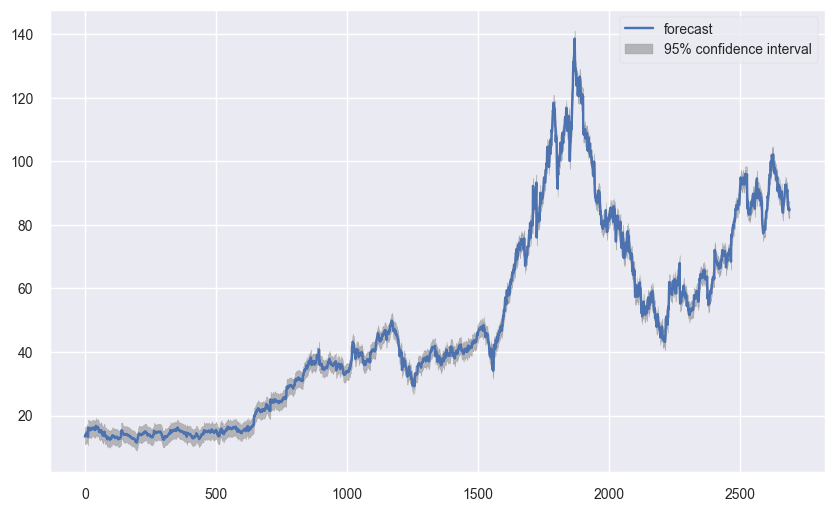

In [100]:
modelohqic = ARIMA(data['Close'].tolist(),order = results['best_order_hqic']).fit()

plt.rcParams.update({'figure.figsize': (10,6)})
fig, ax = plt.subplots()
plot_predict(modelohqic, 2, ax = ax)
plt.show()

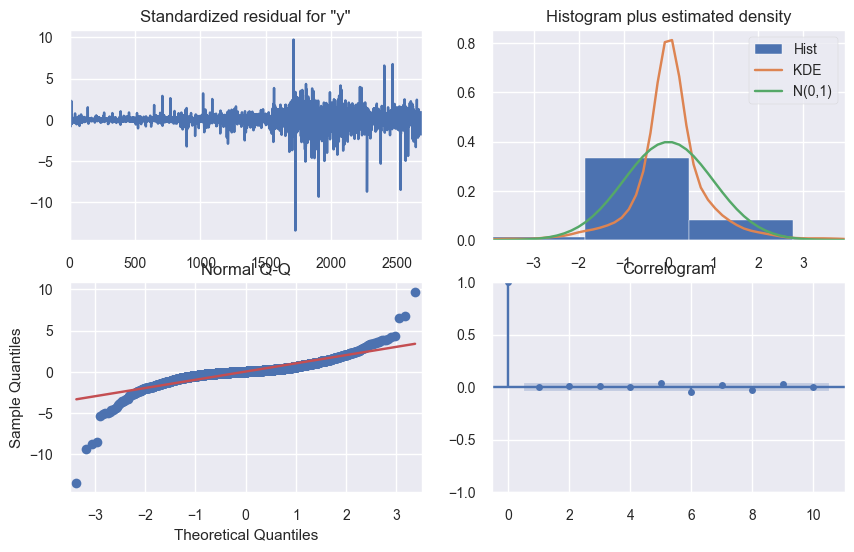

In [101]:
modelohqic.plot_diagnostics()
plt.show()

El primer gr√°fico muestra los residuos (diferencia entre los valores observados y los valores ajustados) frente a los valores ajustados. Idealmente, los residuos deben estar distribuidos aleatoriamente alrededor de cero y no mostrar ning√∫n patr√≥n sistem√°tico, sin embargo, en la gr√°fica en bastantes observaciones estos residuos difieren bastante de 0.

El segundo gr√°fico, histograma, muestra la distribuci√≥n de los residuos en un histograma. La distribuci√≥n deber√≠a parecerse a una distribuci√≥n normal, con una forma de campana sim√©trica alrededor de cero. Un histograma muy asim√©trico o sesgado indica que los residuos no est√°n distribuidos normalmente. Tal como se observa en la gr√°fica, estos residuos no siguen una distribuci√≥n normal, lo cual es confirmado con el tercer gr√°fico: Q-Q plot.

En cuanto a la cuarta gr√°fica, el correlograma, no se observa autocorrelaci√≥n significativa en los diferentes retardos (lags). En el gr√°fico, las barras que se extienden m√°s all√° de las bandas de confianza indican autocorrelaci√≥n en esos retardos, lo que sugiere que el modelo puede no estar capturando todas las dependencias en los datos, sin embargo, esto no se presenta para este modelo. 


In [102]:
resid_clean = pd.Series(modelohqic.resid).replace([np.inf, -np.inf], np.nan).dropna()
stat, p = shapiro(resid_clean)

alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('No normal')

print('Statistics=%.3f, p=%.3f' % (stat, p))

No normal
Statistics=0.777, p=0.000


Esto confirma que los residuos no siguen una distribuci√≥n normal, tal como se observaba en el histograma y los Q-Q plots.

## $\mathtt{An√°lisis\;de\;m√©tricas\;por\;criterio}$

In [103]:
pd.DataFrame({
    'M√©trica 7 d√≠as': raic['M√©trica'],
    'AIC - rolling': raic['D√≠as 7'],
    'AIC - no rolling': nraic['D√≠as 7'],
    'BIC - rolling': rbic['D√≠as 7'],
    'BIC - no rolling': nrbic['D√≠as 7'],
    'HQIC - rolling': rhqic['D√≠as 7'],
    'HQIC - no rolling': nrhqic['D√≠as 7'],
})

M√©trica 7 d√≠as  AIC - rolling  AIC - no rolling  BIC - rolling  \
0           MAPE       1.312539               NaN       1.315387   
1            MAE       1.121135          2.002013       1.124287   
2            MSE       1.777947          5.520341       1.862735   
3           RMSE       1.333397          2.349541       1.364820   
4             R2      -0.108722         -2.442467      -0.161595   

   BIC - no rolling  HQIC - rolling  HQIC - no rolling  
0               NaN       15.597257                NaN  
1          1.987144       13.207305           2.021080  
2          5.273568     1024.359477           5.442725  
3          2.296425       32.005616           2.332965  
4         -2.288580     -637.787237          -2.394065

Al evaluar los seis modelos distintos, cada uno utilizando las m√©tricas **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**, y los criterios **AIC**, **BIC** y **HQIC**, se observa lo siguiente: para **MAPE**, el modelo rolling con **AIC** ofrece el valor menor de 1.312539. Para **MAE**, el modelo rolling con **AIC** muestra un valor de 1.121135, que es significativamente m√°s bajo que el MAE de 2.002013 del modelo no rolling con **AIC**, indicando un menor error absoluto medio en el modelo rolling. En t√©rminos de **MSE**, el modelo rolling con **AIC** presenta un valor de 1.777947, frente al MSE m√°s alto de 5.520341 del modelo no rolling, lo que sugiere una mejor precisi√≥n en el modelo rolling. El **RMSE** sigue la misma tendencia, con el modelo rolling con **AIC** mostrando un valor de 1.333397 frente al 2.349541 del modelo no rolling, reflejando un menor error cuadr√°tico medio. Para **R¬≤**, aunque ambos modelos tienen valores negativos, el modelo rolling con **AIC** (-0.108722) tiene un R¬≤ menos negativo en comparaci√≥n con el modelo no rolling (-2.442467), sugiriendo un rendimiento ligeramente mejor.

En el caso de **BIC**, el modelo rolling con **BIC** tiene un **MAPE** de 1.315387, que es ligeramente peor que el modelo rolling con **AIC**. Para **MAE**, el modelo rolling con **BIC** muestra un valor de 1.124287, que es muy cercano al MAE del modelo rolling con **AIC**. El **MSE** para el modelo rolling con **BIC** es de 1.862735, que es mayor que el **MSE** del modelo rolling con **AIC** pero sigue siendo mejor que el de los modelos no rolling. El **RMSE** para el modelo rolling con **BIC** es de 1.364820, que es mayor que el del modelo rolling con **AIC** pero a√∫n as√≠ no es mayor que el de los modelos no rolling. En cuanto al **R¬≤**, el modelo rolling con **BIC** tiene un valor de -0.161595, que es menos negativo que el **R¬≤** del modelo no rolling pero peor que el del modelo rolling con **AIC**.

Para **HQIC**, el modelo rolling con **HQIC** tiene un **MAPE** de 15.597257, que es considerablemente peor que todos los dem√°s modelos. El **MAE** del modelo rolling con **HQIC** es de 13.207305, que tambi√©n es m√°s alto que los de los modelos **AIC** y **BIC**. El **MSE** es de 1024.359477, el m√°s alto entre todos los modelos, y el **RMSE** de 32.005616 es igualmente el mayor. El **R¬≤** para el modelo rolling con **HQIC** es -637.787237, extremadamente bajo, indicando el peor desempe√±o entre los modelos.

Es decir, el modelo rolling con **AIC** es el que generalmente muestra el mejor rendimiento en la mayor√≠a de las m√©tricas, seguido por el modelo rolling con **BIC**. Los modelos rolling, en general, tienden a superar a los modelos no rolling en t√©rminos de **MAPE**, **MAE**, **MSE** y **RMSE**. Los modelos con **HQIC** no ofrecen un rendimiento competitivo en comparaci√≥n con los otros criterios.

In [104]:
pd.DataFrame({
    'M√©trica 14 d√≠as': raic['M√©trica'],
    'AIC - rolling': raic['D√≠as 14'],
    'AIC - no rolling': nraic['D√≠as 14'],
    'BIC - rolling': rbic['D√≠as 14'],
    'BIC - no rolling': nrbic['D√≠as 14'],
    'HQIC - rolling': rhqic['D√≠as 14'],
    'HQIC - no rolling': nrhqic['D√≠as 14'],
})

M√©trica 14 d√≠as  AIC - rolling  AIC - no rolling  BIC - rolling  \
0            MAPE       1.212652               NaN       1.160648   
1             MAE       1.064800          2.519703       1.018572   
2             MSE       1.431246          8.349668       1.411075   
3            RMSE       1.196347          2.889579       1.187887   
4              R2       0.822724         -0.034200       0.825223   

   BIC - no rolling  HQIC - rolling  HQIC - no rolling  
0               NaN        8.370949                NaN  
1          2.545715        7.122699           2.580556  
2          8.426731      512.780690           8.608524  
3          2.902883       22.644661           2.934029  
4         -0.043745      -62.513607          -0.066262

Al evaluar los seis modelos distintos utilizando las m√©tricas **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**, y los criterios **AIC**, **BIC** y **HQIC** para un horizonte de 14 d√≠as, se observa lo siguiente: para **MAPE**, el modelo rolling con **BIC** ofrece el valor m√°s bajo de 1.160648, que es superior al valor de 1.212652 del modelo rolling con **AIC**. Para **MAE**, el modelo rolling con **BIC** tambi√©n presenta un valor de 1.018572, significativamente m√°s bajo que el MAE de 1.064800 del modelo rolling con **AIC**, lo que indica una menor desviaci√≥n media en el modelo rolling con **BIC**. En t√©rminos de **MSE**, el modelo rolling con **BIC** muestra un valor de 1.411075, que es ligeramente mejor que el MSE de 1.431246 del modelo rolling con **AIC**, pero ambos valores son mucho mejores que el MSE de 8.349668 de los modelos no rolling. El **RMSE** sigue la misma tendencia, con el modelo rolling con **BIC** mostrando un valor de 1.187887 frente al 1.196347 del modelo rolling con **AIC** y el valor m√°s alto de 2.889579 de los modelos no rolling. Para **R¬≤**, el modelo rolling con **BIC** tiene un valor de 0.825223, que es el m√°s alto entre los modelos analizados y ligeramente mejor que el R¬≤ de 0.822724 del modelo rolling con **AIC**. Los modelos no rolling tienen valores de **R¬≤** negativos, lo que indica un rendimiento inferior en comparaci√≥n con los modelos rolling.

Para **HQIC**, el modelo rolling con **HQIC** muestra un **MAPE** de 8.370949, que es peor que los valores de los modelos **AIC** y **BIC**. El **MAE** del modelo rolling con **HQIC** es de 7.122699, que tambi√©n es m√°s alto en comparaci√≥n con los modelos **AIC** y **BIC**. El **MSE** y el **RMSE** son tambi√©n los m√°s altos en el modelo rolling con **HQIC**, con valores de 512.780690 y 22.644661, respectivamente. El **R¬≤** para el modelo rolling con **HQIC** es de -62.513607, el m√°s bajo entre todos los modelos, lo que indica un rendimiento deficiente.

En resumen, el modelo rolling con **BIC** es el que generalmente muestra el mejor rendimiento en la mayor√≠a de las m√©tricas para un horizonte de 14 d√≠as, seguido por el modelo rolling con **AIC**. Los modelos rolling en general tienden a superar a los modelos no rolling en t√©rminos de **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**. Los modelos con **HQIC** no ofrecen un rendimiento competitivo en comparaci√≥n con los otros criterios.

In [105]:
pd.DataFrame({
    'M√©trica 21 d√≠as': raic['M√©trica'],
    'AIC - rolling': raic['D√≠as 21'],
    'AIC - no rolling': nraic['D√≠as 21'],
    'BIC - rolling': rbic['D√≠as 21'],
    'BIC - no rolling': nrbic['D√≠as 21'],
    'HQIC - rolling': rhqic['D√≠as 21'],
    'HQIC - no rolling': nrhqic['D√≠as 21'],
})

M√©trica 21 d√≠as  AIC - rolling  AIC - no rolling  BIC - rolling  \
0            MAPE       1.146243               NaN       1.110016   
1             MAE       1.014617          2.705316       0.982382   
2             MSE       1.402353          9.062227       1.399503   
3            RMSE       1.184210          3.010353       1.183006   
4              R2       0.802789         -0.274406       0.803190   

   BIC - no rolling  HQIC - rolling  HQIC - no rolling  
0               NaN        5.924117                NaN  
1          2.730000        5.058275           2.752778  
2          9.153116      342.326566           9.266348  
3          3.025412       18.502069           3.044068  
4         -0.287187      -47.140810          -0.303111

Al evaluar los seis modelos distintos utilizando las m√©tricas **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**, y los criterios **AIC**, **BIC** y **HQIC** para un horizonte de 21 d√≠as, se observa lo siguiente: para **MAPE**, el modelo rolling con **BIC** presenta el valor m√°s bajo de 1.110016, superando al modelo rolling con **AIC** que muestra un MAPE de 1.146243. En cuanto a **MAE**, el modelo rolling con **BIC** tiene un valor de 0.982382, que es notablemente mejor que el MAE de 1.014617 del modelo rolling con **AIC**, y tambi√©n supera a los modelos no rolling que presentan valores m√°s altos. Para **MSE**, el modelo rolling con **BIC** muestra un valor de 1.399503, que es ligeramente mejor que el MSE de 1.402353 del modelo rolling con **AIC**, y significativamente mejor que los valores m√°s altos de los modelos no rolling. El **RMSE** sigue una tendencia similar, con el modelo rolling con **BIC** presentando un valor de 1.183006 frente al 1.184210 del modelo rolling con **AIC**, y superando al valor m√°s alto de 3.010353 de los modelos no rolling. En t√©rminos de **R¬≤**, el modelo rolling con **BIC** tiene un valor de 0.803190, que es el m√°s alto entre todos los modelos, en comparaci√≥n con el R¬≤ de 0.802789 del modelo rolling con **AIC** y los valores negativos de los modelos no rolling.

Para **HQIC**, el modelo rolling con **HQIC** muestra un **MAPE** de 5.924117, que es peor que los valores de los modelos **AIC** y **BIC**. El **MAE** del modelo rolling con **HQIC** es de 5.058275, lo cual tambi√©n es superior a los valores de los modelos **AIC** y **BIC**. El **MSE** y el **RMSE** en el modelo rolling con **HQIC** son de 342.326566 y 18.502069, respectivamente, ambos significativamente m√°s altos que los valores de los modelos **AIC** y **BIC**. El **R¬≤** para el modelo rolling con **HQIC** es de -47.140810, el m√°s bajo entre todos los modelos, indicando el peor desempe√±o.

En resumen, el modelo rolling con **BIC** demuestra el mejor rendimiento en la mayor√≠a de las m√©tricas para un horizonte de 21 d√≠as, seguido por el modelo rolling con **AIC**. Los modelos rolling generalmente superan a los modelos no rolling en t√©rminos de **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**. Los modelos con **HQIC** no son competitivos en comparaci√≥n con los otros criterios.

In [106]:
pd.DataFrame({
    'M√©trica 28 d√≠as': raic['M√©trica'],
    'AIC - rolling': raic['D√≠as 28'],
    'AIC - no rolling': nraic['D√≠as 28'],
    'BIC - rolling': rbic['D√≠as 28'],
    'BIC - no rolling': nrbic['D√≠as 28'],
    'HQIC - rolling': rhqic['D√≠as 28'],
    'HQIC - no rolling': nrhqic['D√≠as 28'],
})

M√©trica 28 d√≠as  AIC - rolling  AIC - no rolling  BIC - rolling  \
0            MAPE       1.087074               NaN       1.059167   
1             MAE       0.955439          2.618068       0.930715   
2             MSE       1.324720          8.271219       1.317260   
3            RMSE       1.150965          2.875973       1.147719   
4              R2       0.835196         -0.028992       0.836125   

   BIC - no rolling  HQIC - rolling  HQIC - no rolling  
0               NaN        4.669373                NaN  
1          2.624643        3.987300           2.636670  
2          8.282847      257.006110           8.345857  
3          2.877993       16.031410           2.888920  
4         -0.030439      -30.973186          -0.038277

Al analizar los seis modelos distintos para un horizonte de 28 d√≠as utilizando las m√©tricas **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**, y los criterios **AIC**, **BIC** y **HQIC**, se observa lo siguiente: para **MAPE**, el modelo rolling con **BIC** presenta el valor m√°s bajo de 1.059167, superando al modelo rolling con **AIC**, que tiene un MAPE de 1.087074. En cuanto a **MAE**, el modelo rolling con **BIC** muestra un valor de 0.930715, que es el m√°s bajo entre todos los modelos, incluyendo los modelos no rolling, que tienen valores m√°s altos. El **MSE** para el modelo rolling con **BIC** es de 1.317260, ligeramente mejor que el MSE de 1.324720 del modelo rolling con **AIC**, y notablemente mejor que los valores m√°s altos de los modelos no rolling. El **RMSE** sigue la misma tendencia, con el modelo rolling con **BIC** mostrando un valor de 1.147719 frente al 1.150965 del modelo rolling con **AIC**, y superando al valor m√°s alto de 2.875973 de los modelos no rolling. En t√©rminos de **R¬≤**, el modelo rolling con **BIC** tiene un valor de 0.836125, que es el m√°s alto entre todos los modelos, en comparaci√≥n con el R¬≤ de 0.835196 del modelo rolling con **AIC** y los valores negativos de los modelos no rolling.

Para **HQIC**, el modelo rolling con **HQIC** muestra un **MAPE** de 4.669373, que es peor que los valores de los modelos **AIC** y **BIC**. El **MAE** del modelo rolling con **HQIC** es de 3.987300, tambi√©n superior a los valores de los modelos **AIC** y **BIC**. El **MSE** y el **RMSE** para el modelo rolling con **HQIC** son de 257.006110 y 16.031410, respectivamente, ambos considerablemente m√°s altos que los valores de los modelos **AIC** y **BIC**. El **R¬≤** para el modelo rolling con **HQIC** es de -30.973186, el m√°s bajo entre todos los modelos, indicando el peor desempe√±o.

En conclusi√≥n, el modelo rolling con **BIC** muestra el mejor rendimiento en la mayor√≠a de las m√©tricas para un horizonte de 28 d√≠as, seguido por el modelo rolling con **AIC**. Los modelos rolling en general superan a los modelos no rolling en t√©rminos de **MAPE**, **MAE**, **MSE**, **RMSE** y **R¬≤**. Los modelos con **HQIC** no ofrecen un rendimiento competitivo en comparaci√≥n con los otros criterios.

### $\mathtt{Conclusiones}$

En conclusi√≥n general, los modelos rolling con **AIC** y **BIC** son consistentemente los mejores en comparaci√≥n con los modelos no rolling, con una ligera ventaja del modelo rolling con **BIC** para horizontes m√°s largos. Los modelos con **HQIC** no muestran un rendimiento competitivo en comparaci√≥n con los modelos con **AIC** y **BIC** en los diferentes horizontes de predicci√≥n.